# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

Dataset: The chosen dataset for this assignment is: https://archive.ics.uci.edu/dataset/850/raisin.

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

In [2]:
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
kecimen_besni = fetch_ucirepo(id=850) 
X = kecimen_besni.data.features 
y = kecimen_besni.data.targets 
print(kecimen_besni.variables) 

y = y.values.ravel()
y_encoded = LabelEncoder().fit_transform(y)
df = pd.concat([X, pd.Series(y_encoded, name='class')], axis=1)

              name     role         type demographic  \
0             Area  Feature      Integer        None   
1  MajorAxisLength  Feature   Continuous        None   
2  MinorAxisLength  Feature   Continuous        None   
3     Eccentricity  Feature   Continuous        None   
4       ConvexArea  Feature      Integer        None   
5           Extent  Feature   Continuous        None   
6        Perimeter  Feature   Continuous        None   
7            Class   Target  Categorical        None   

                                         description units missing_values  
0  Gives the number of pixels within the boundari...  None             no  
1  It measures the environment by calculating the...  None             no  
2  Gives the length of the main axis, which is th...  None             no  
3  Gives the length of the small axis, which is t...  None             no  
4  It gives a measure of the eccentricity of the ...  None             no  
5  Gives the number of pixels of the sm

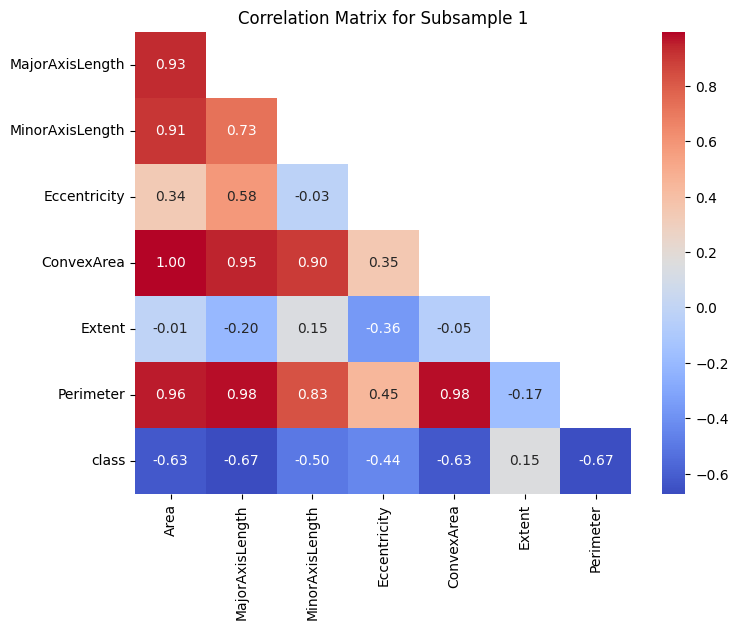

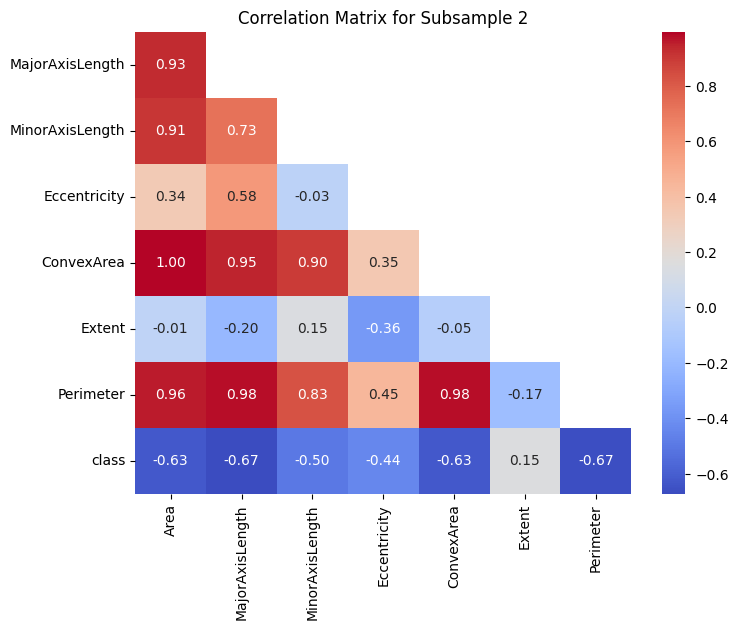

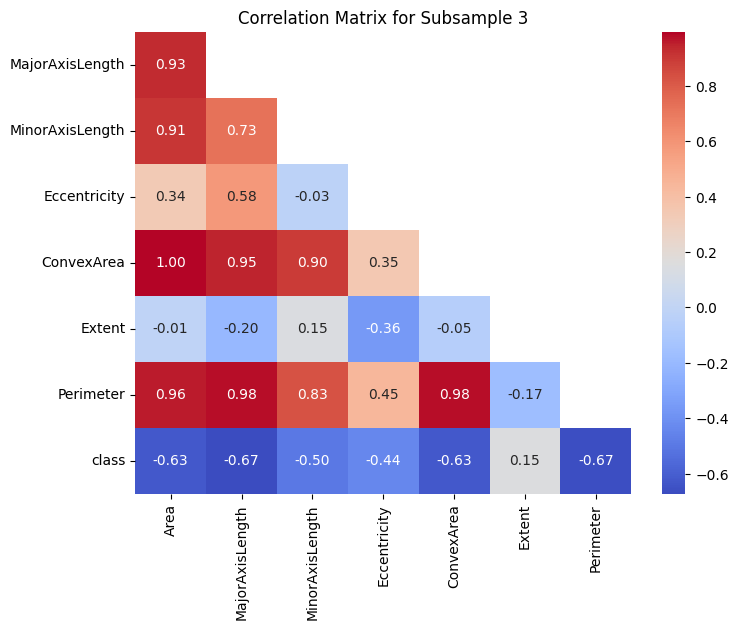

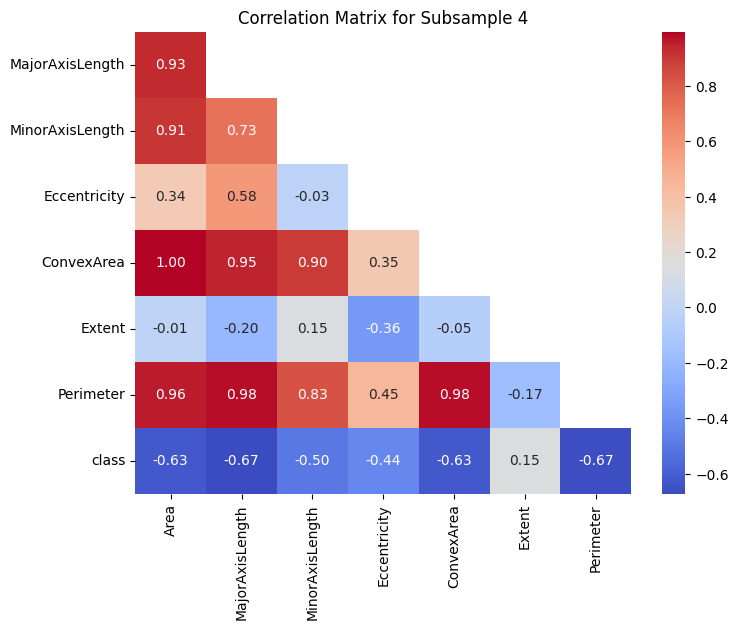

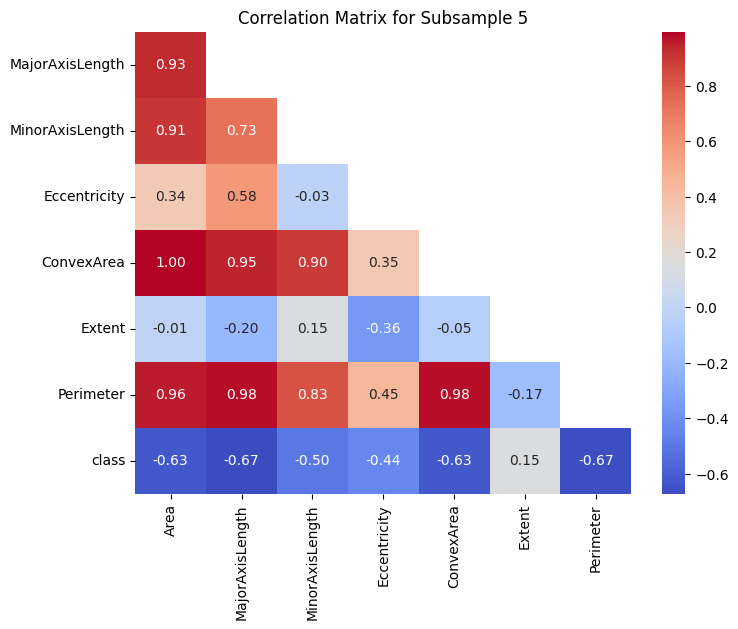

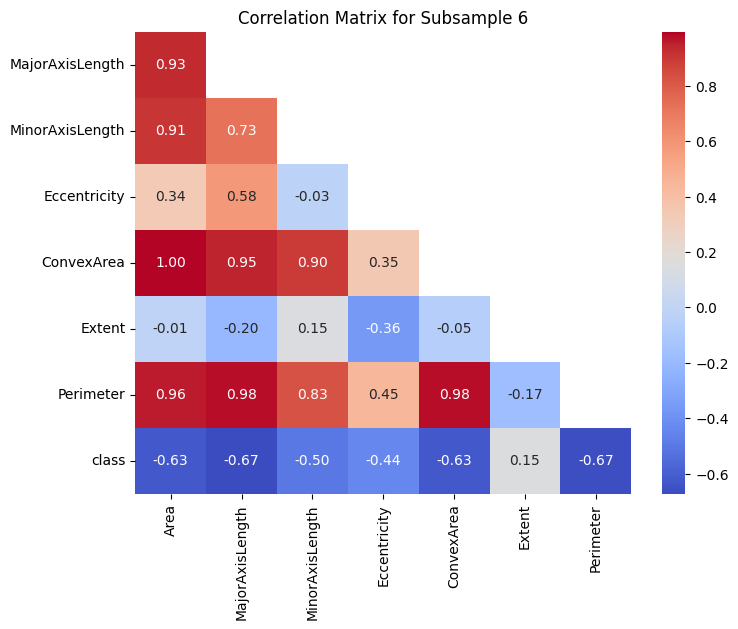

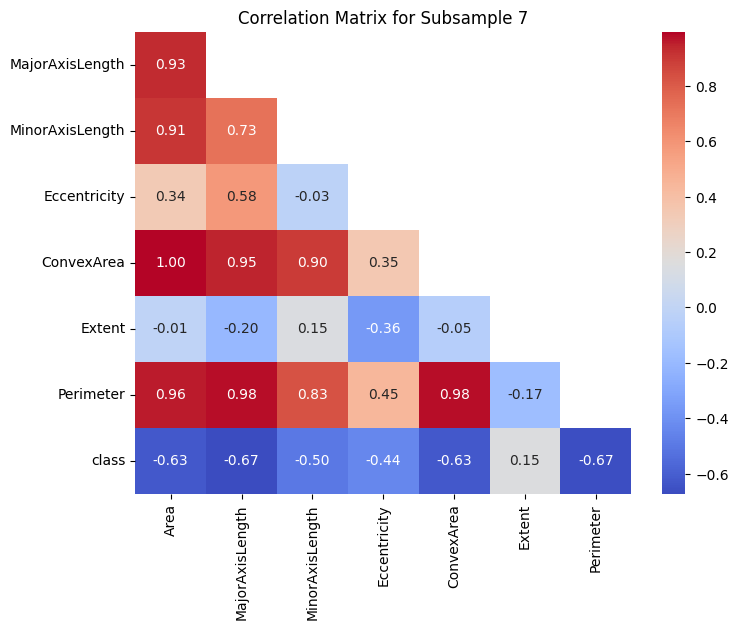

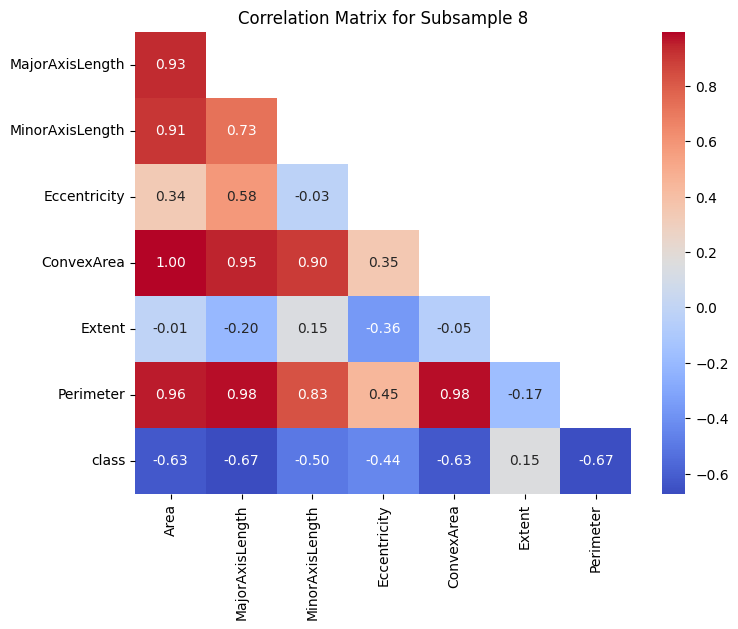

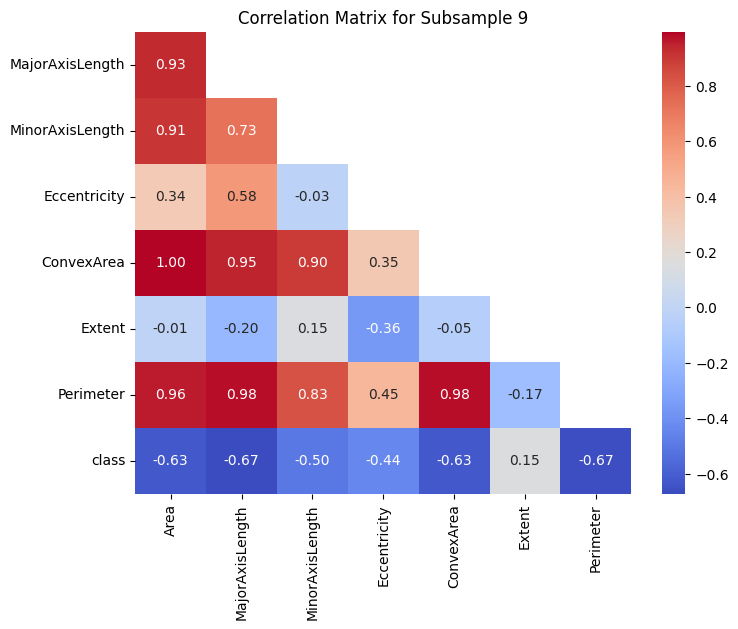

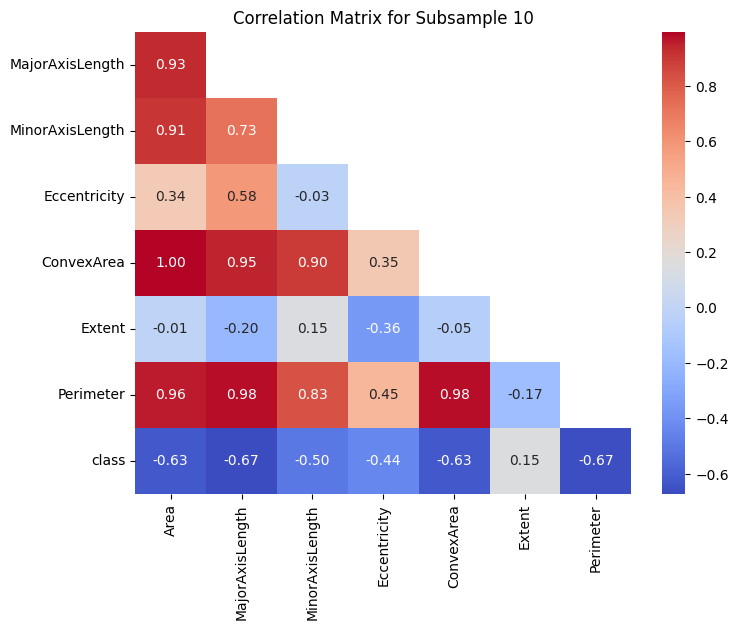

In [4]:
num_subsamples = 10
subsample_size = len(df)

for i in range(num_subsamples):
    subsample = df.sample(subsample_size, random_state=i)
    correlation_matrix = subsample.corr()
    mask = np.zeros_like(correlation_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    df_corr_viz = correlation_matrix.mask(mask).dropna(how='all').dropna(axis=1, how='all')
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_corr_viz, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Matrix for Subsample {i+1}')
    plt.show()

**TASK (Classification): If your problem is a classification problem, visually check if the target variable is imbalanced**

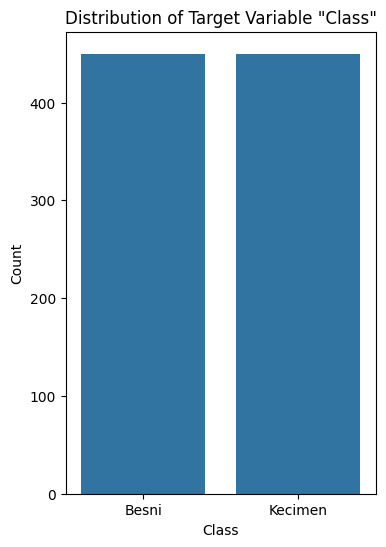

In [15]:
y = pd.Series(y).astype('category')

plt.figure(figsize=(4, 6))
sns.countplot(x=y)
plt.title('Distribution of Target Variable "Class"')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**Exactly 450 seeds (900 total) of each species were taken for the dataset.**

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

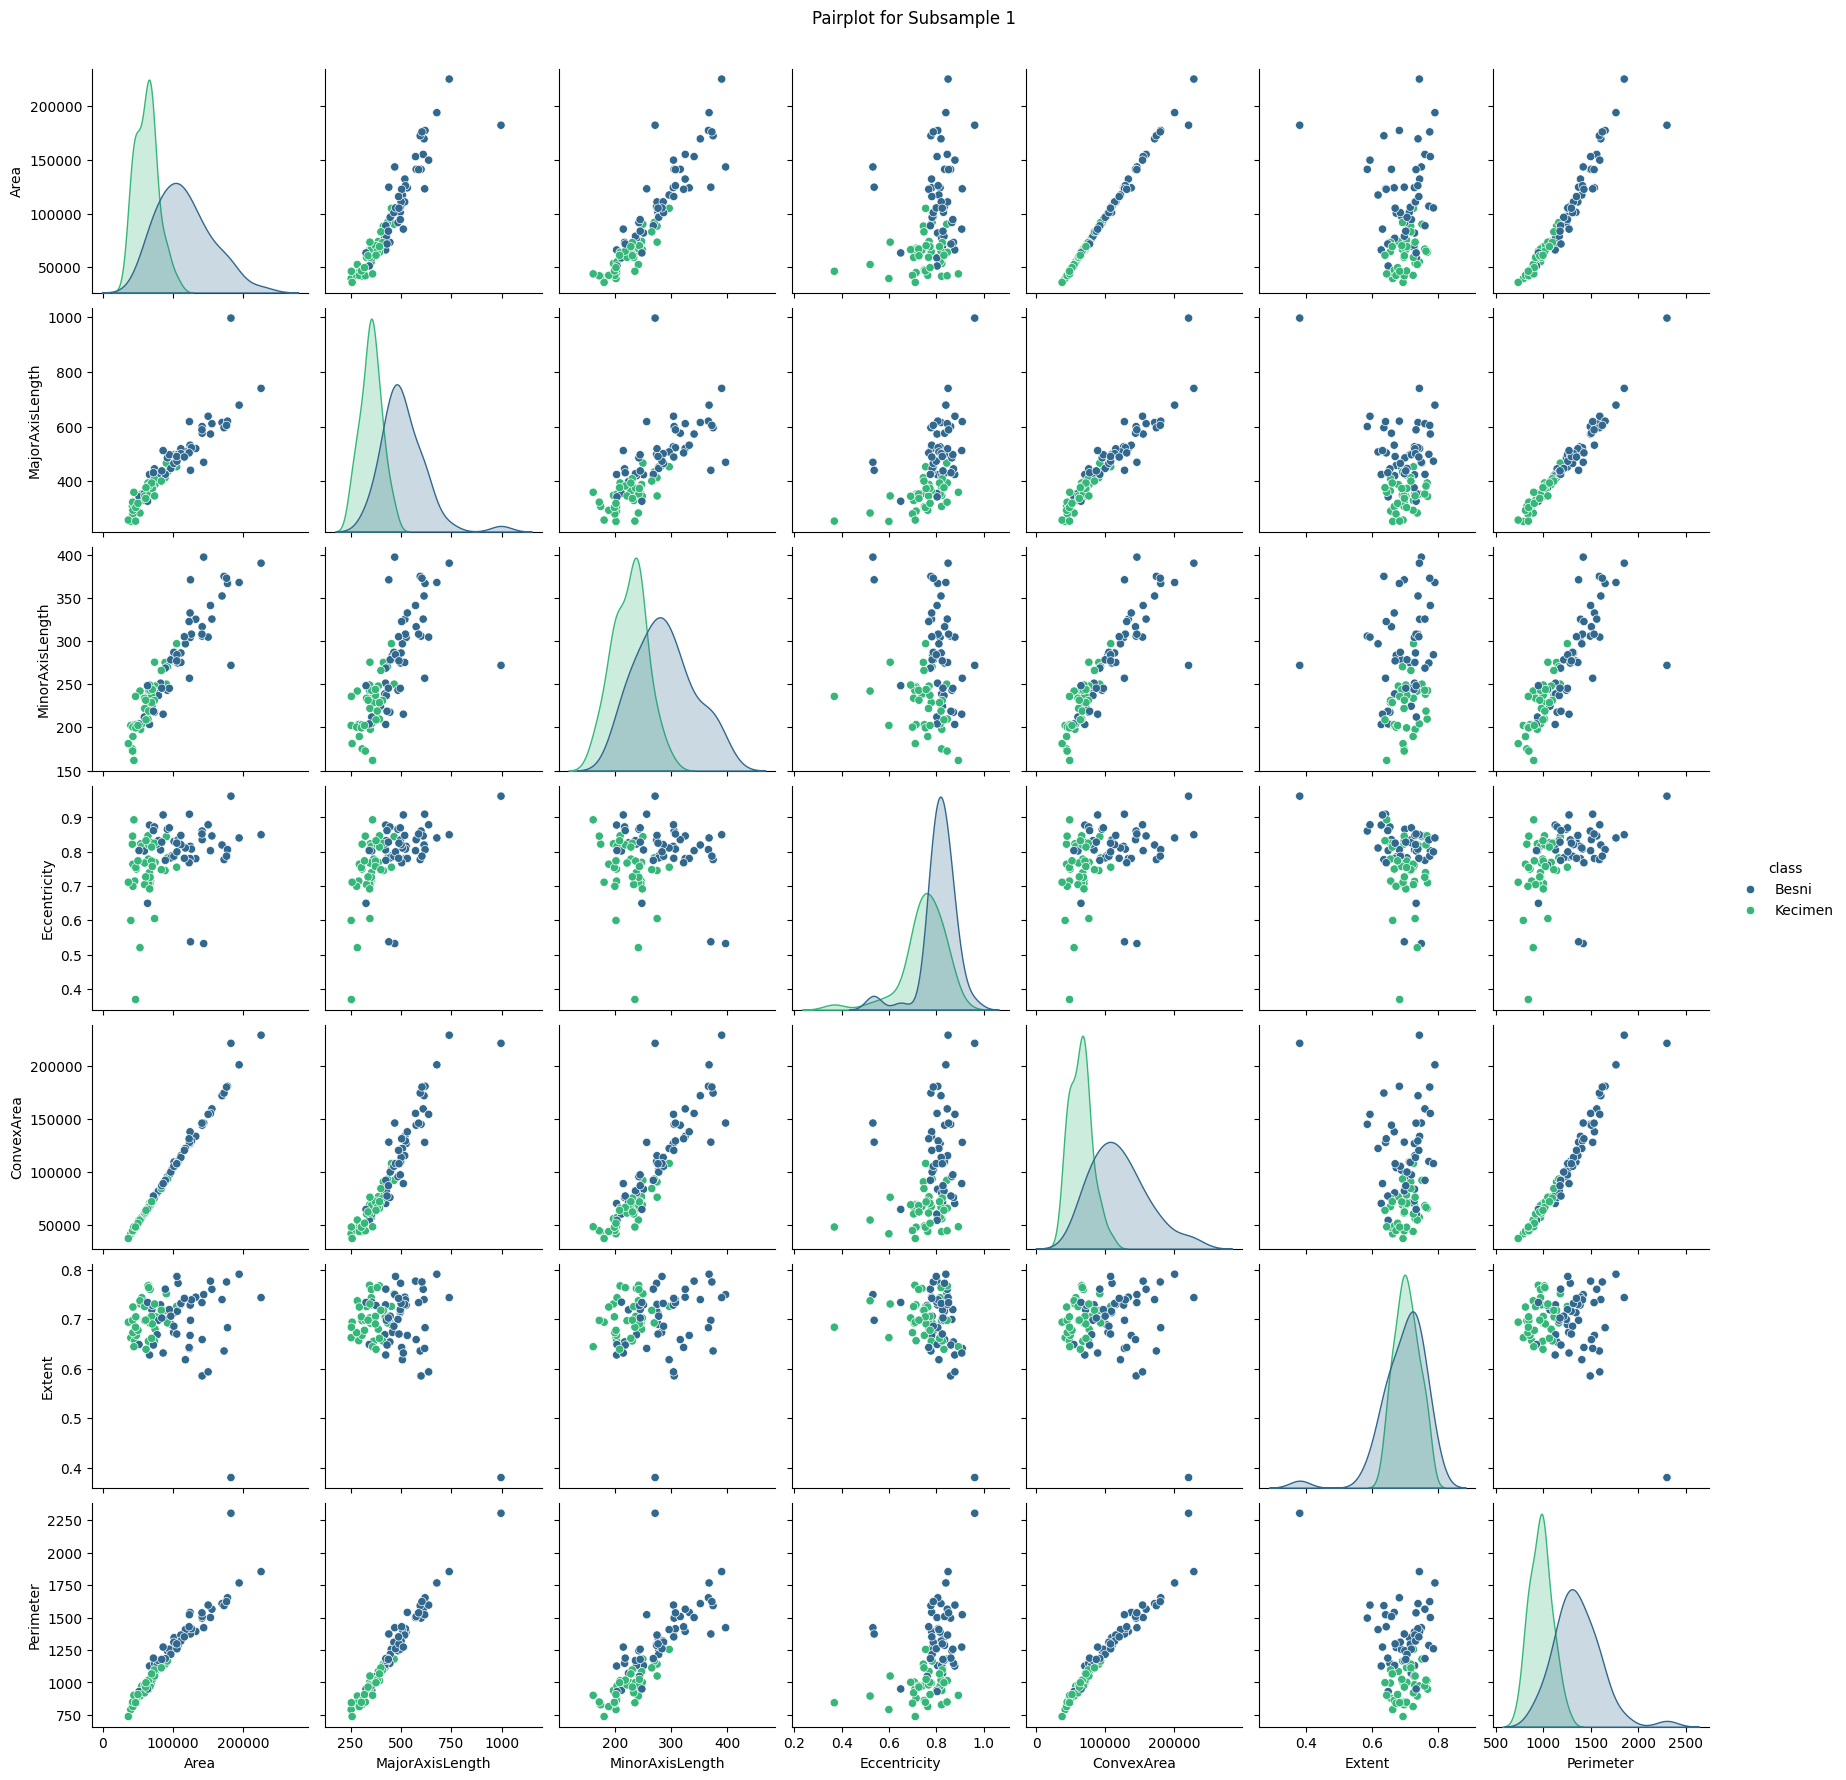

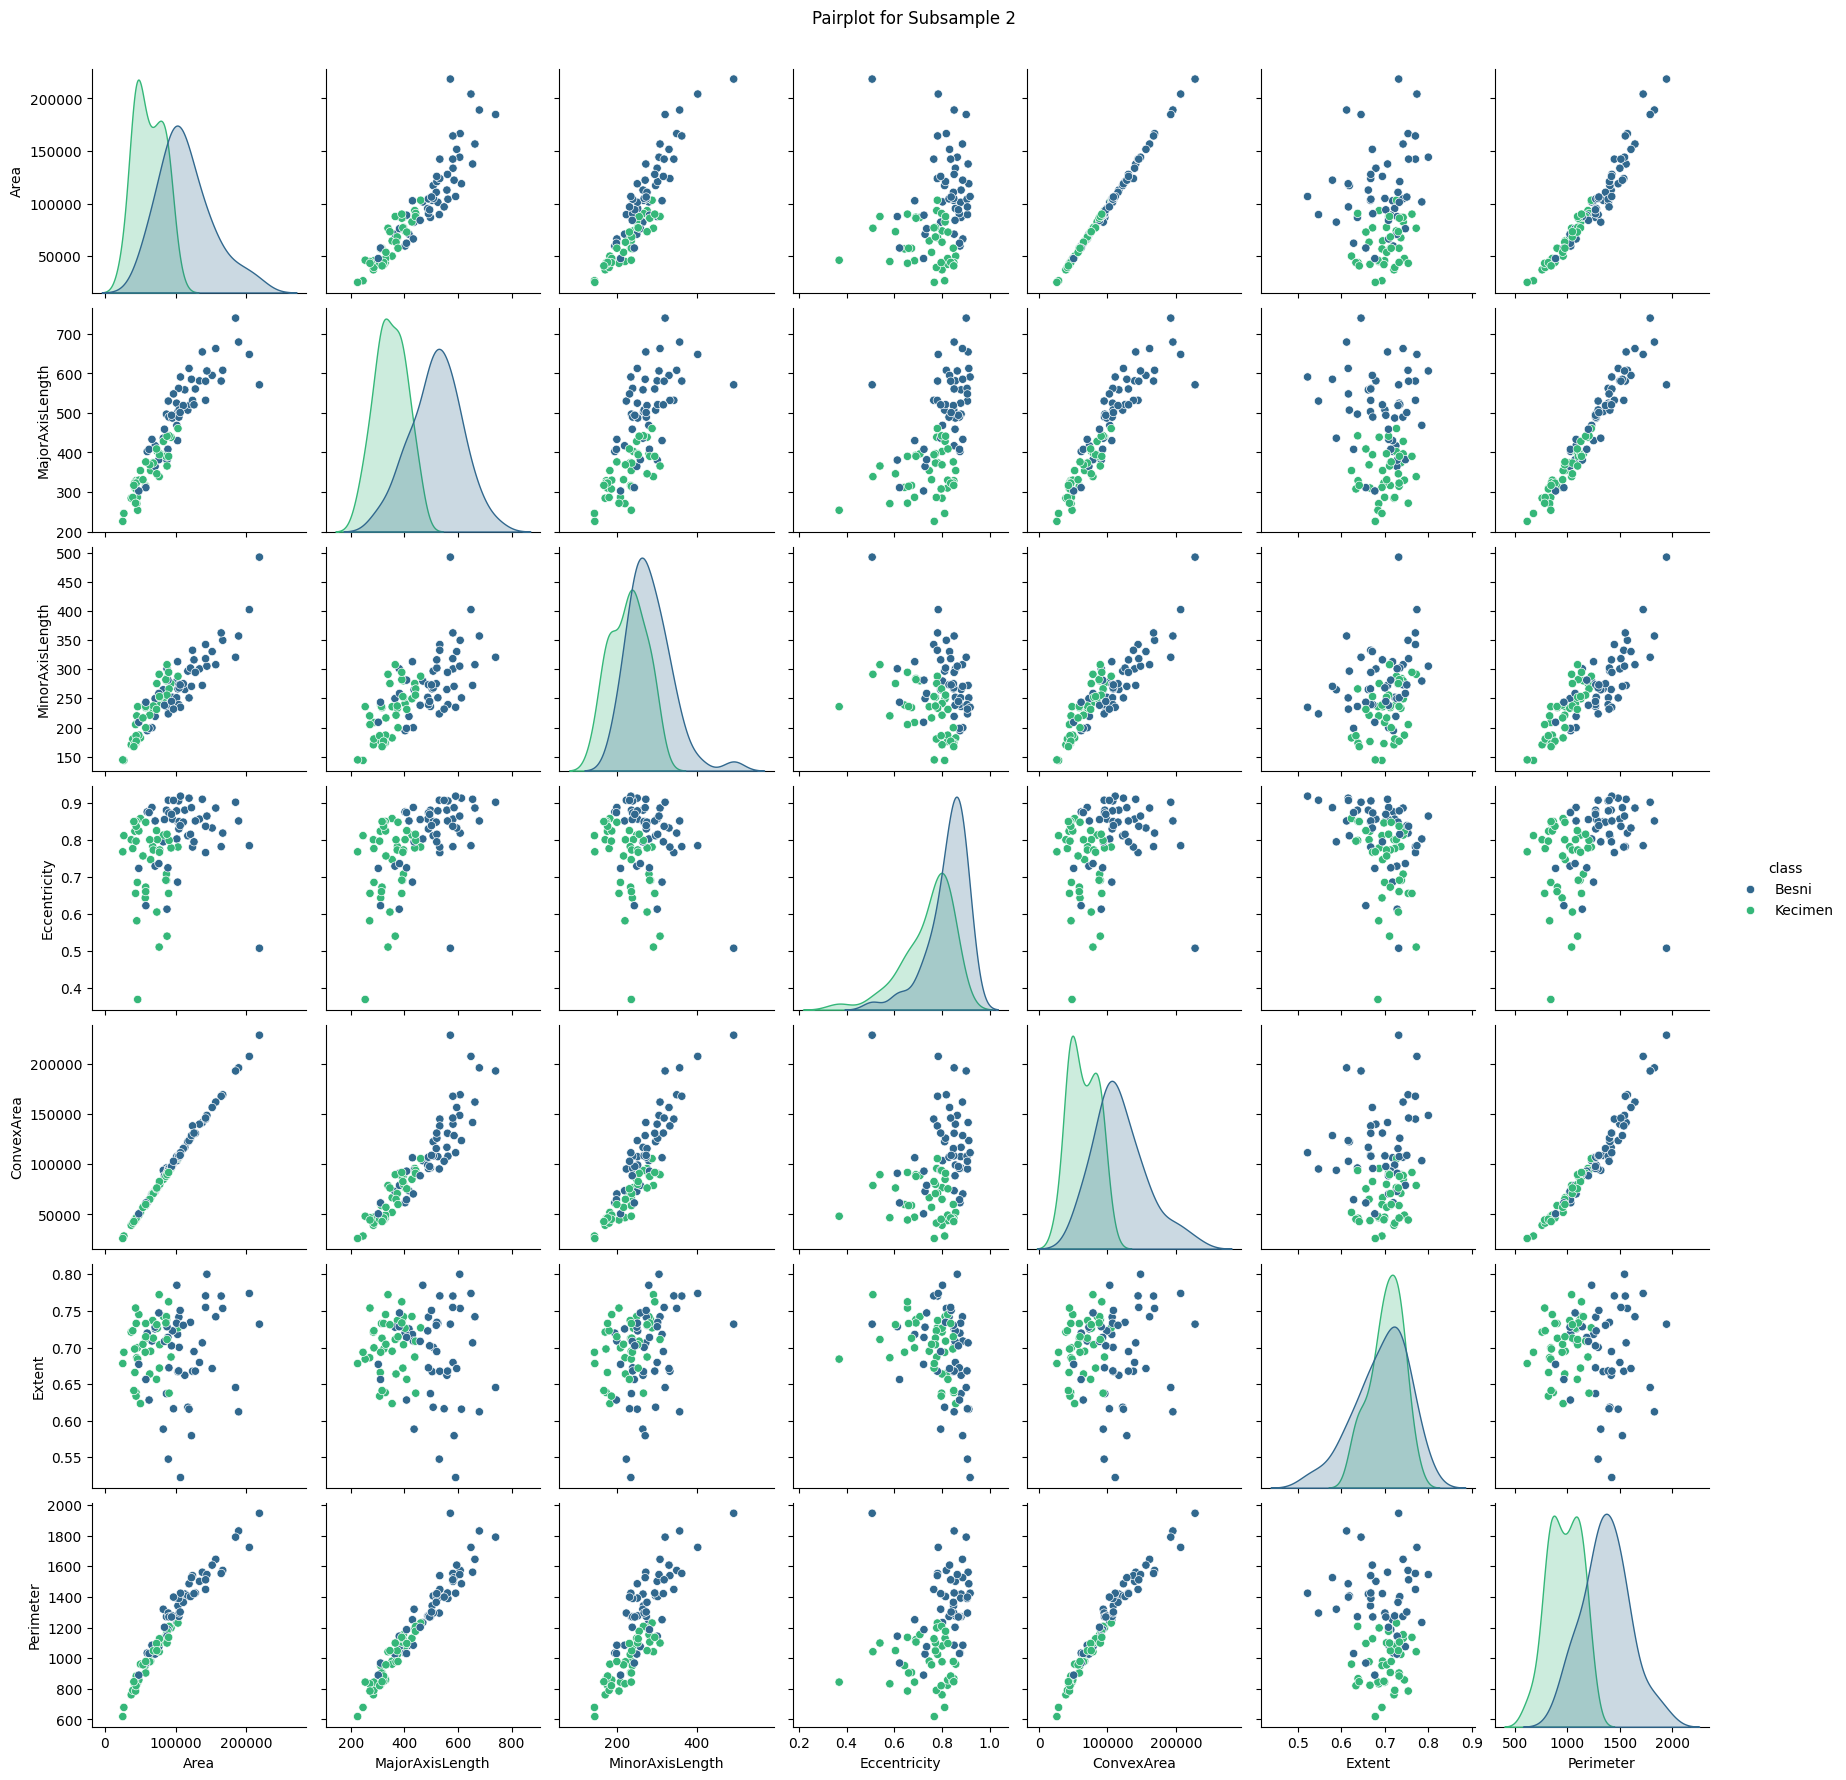

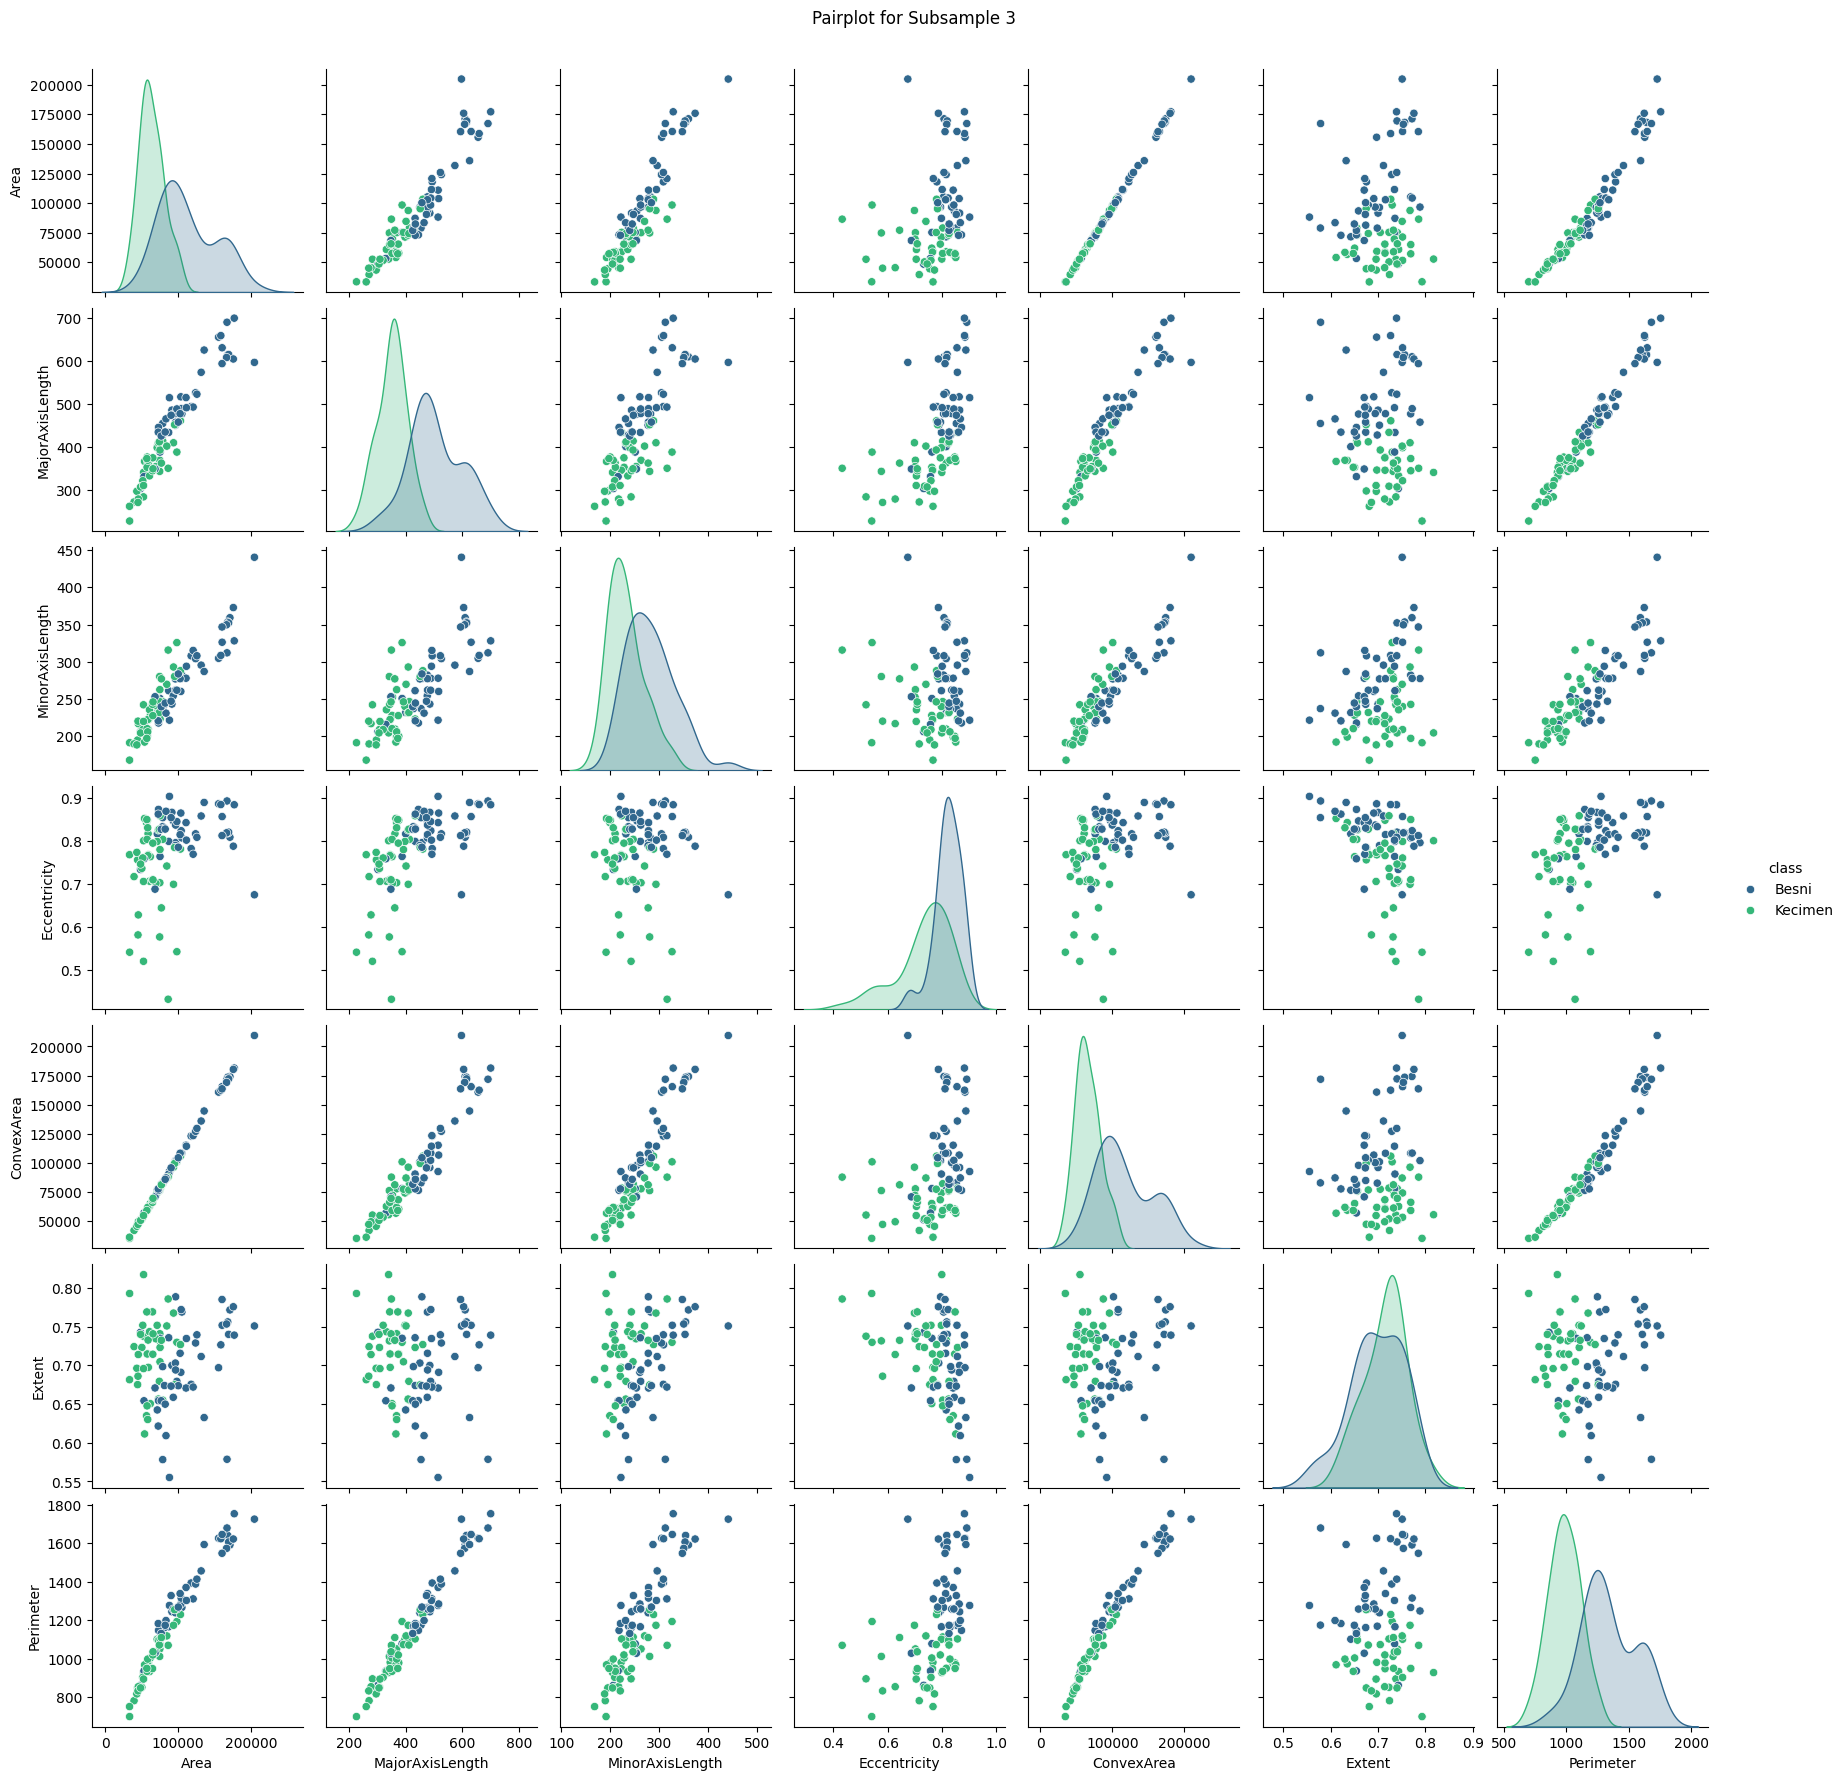

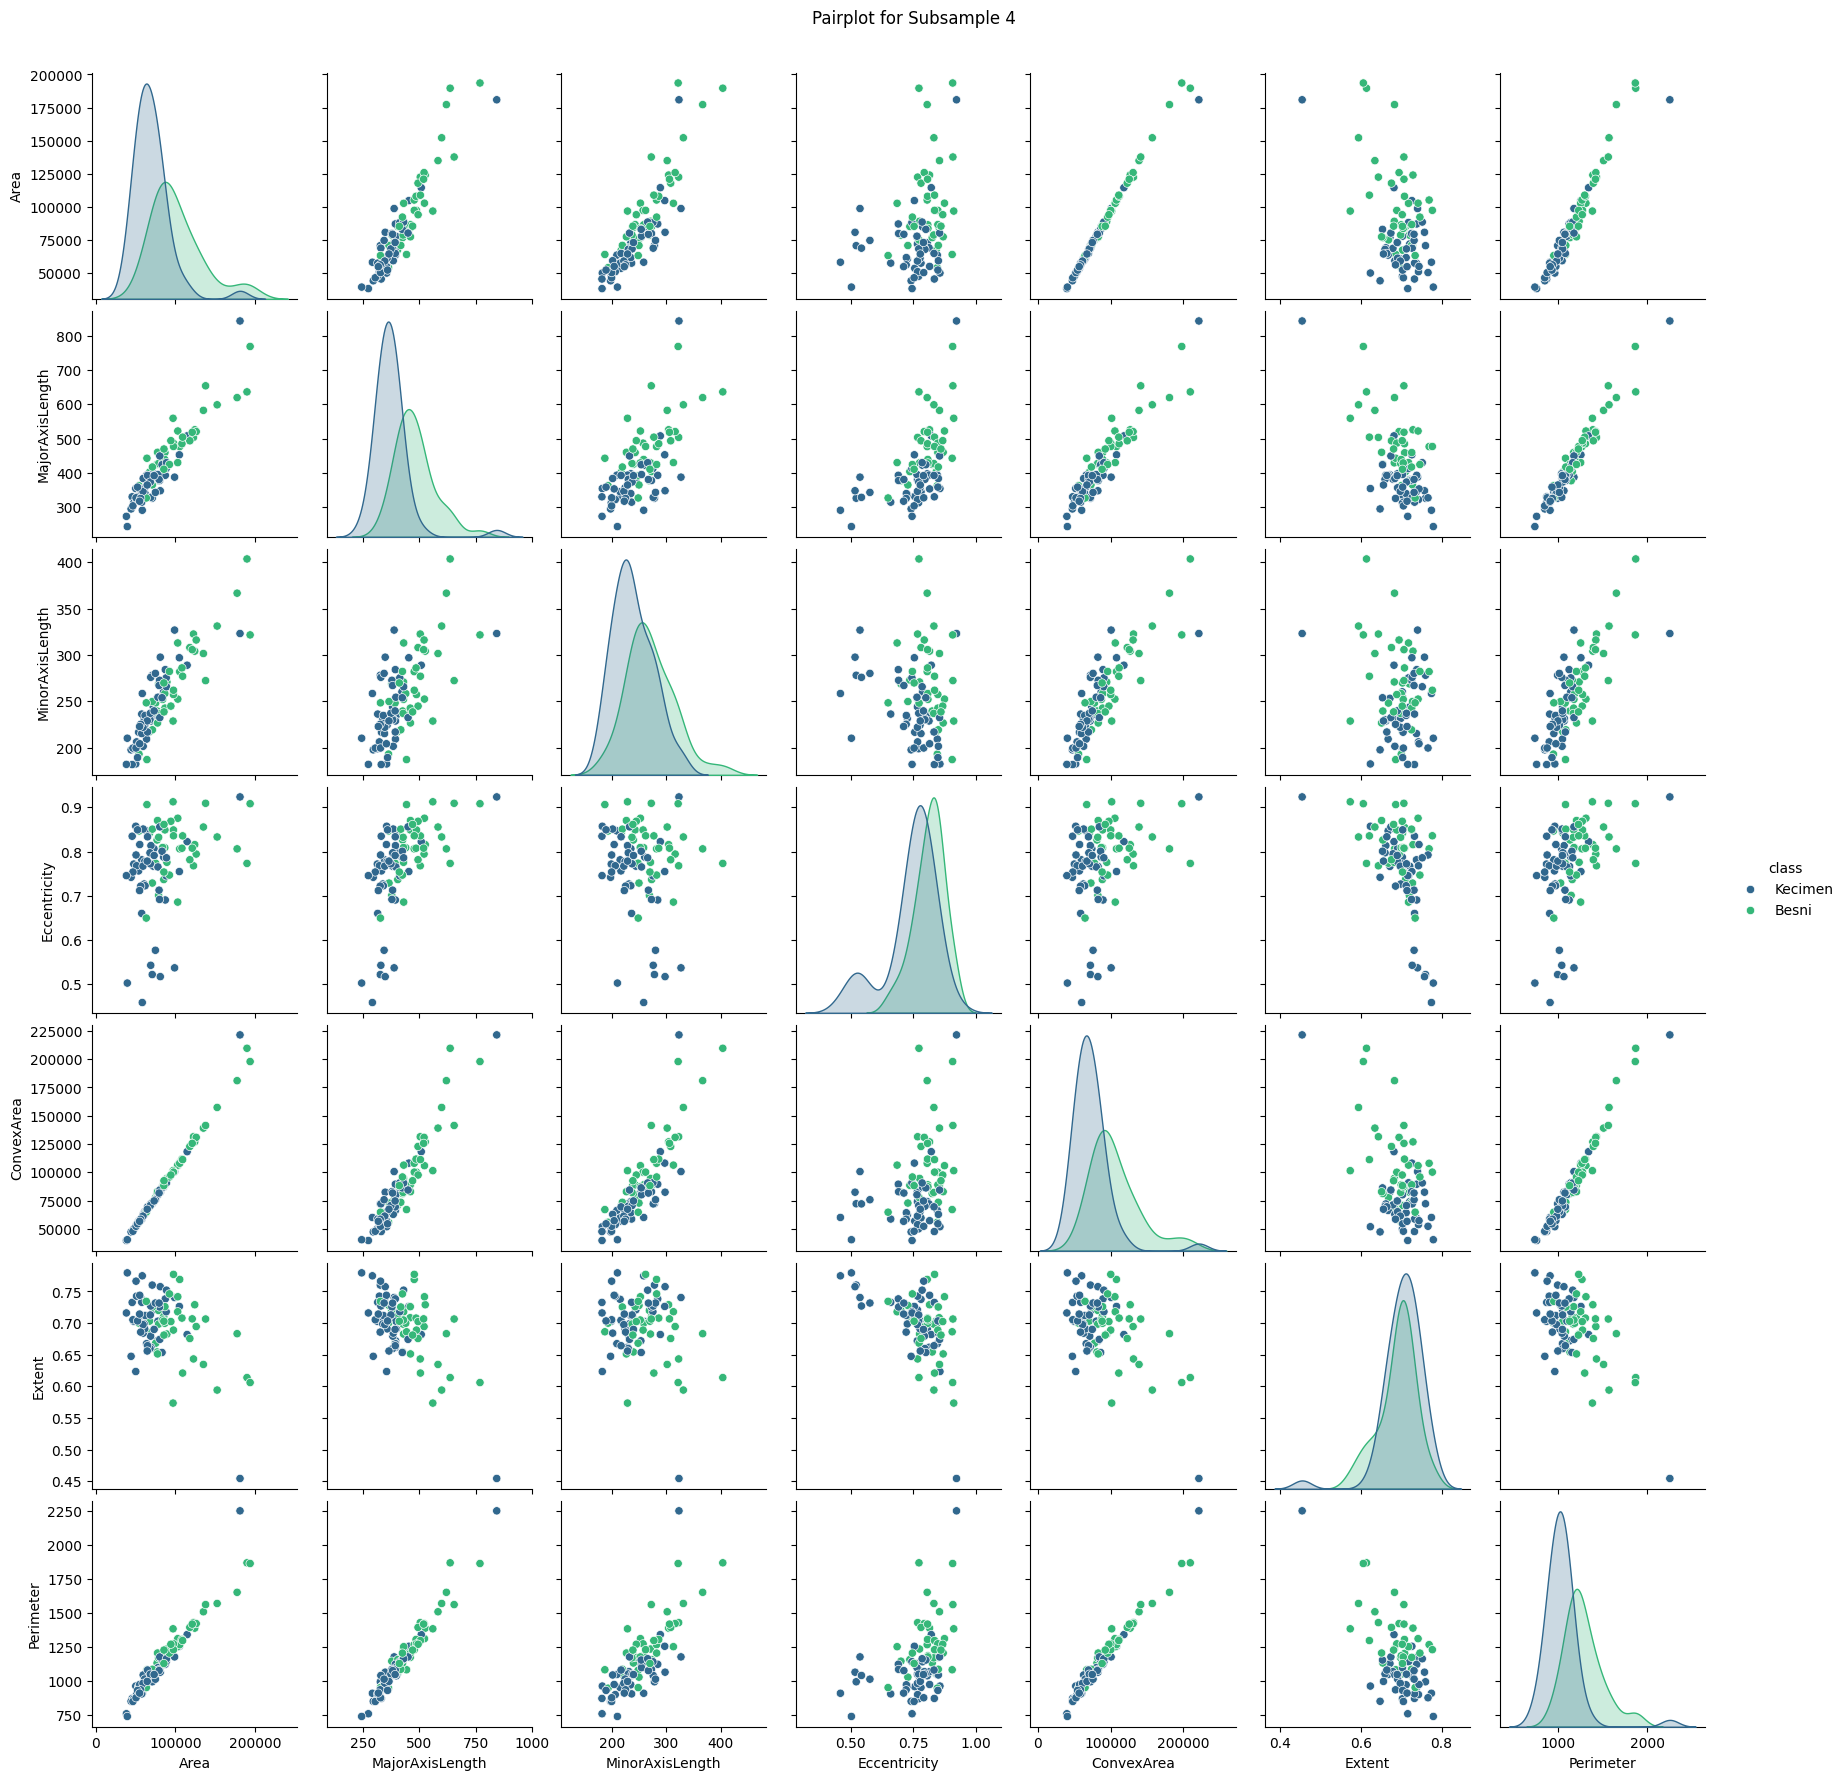

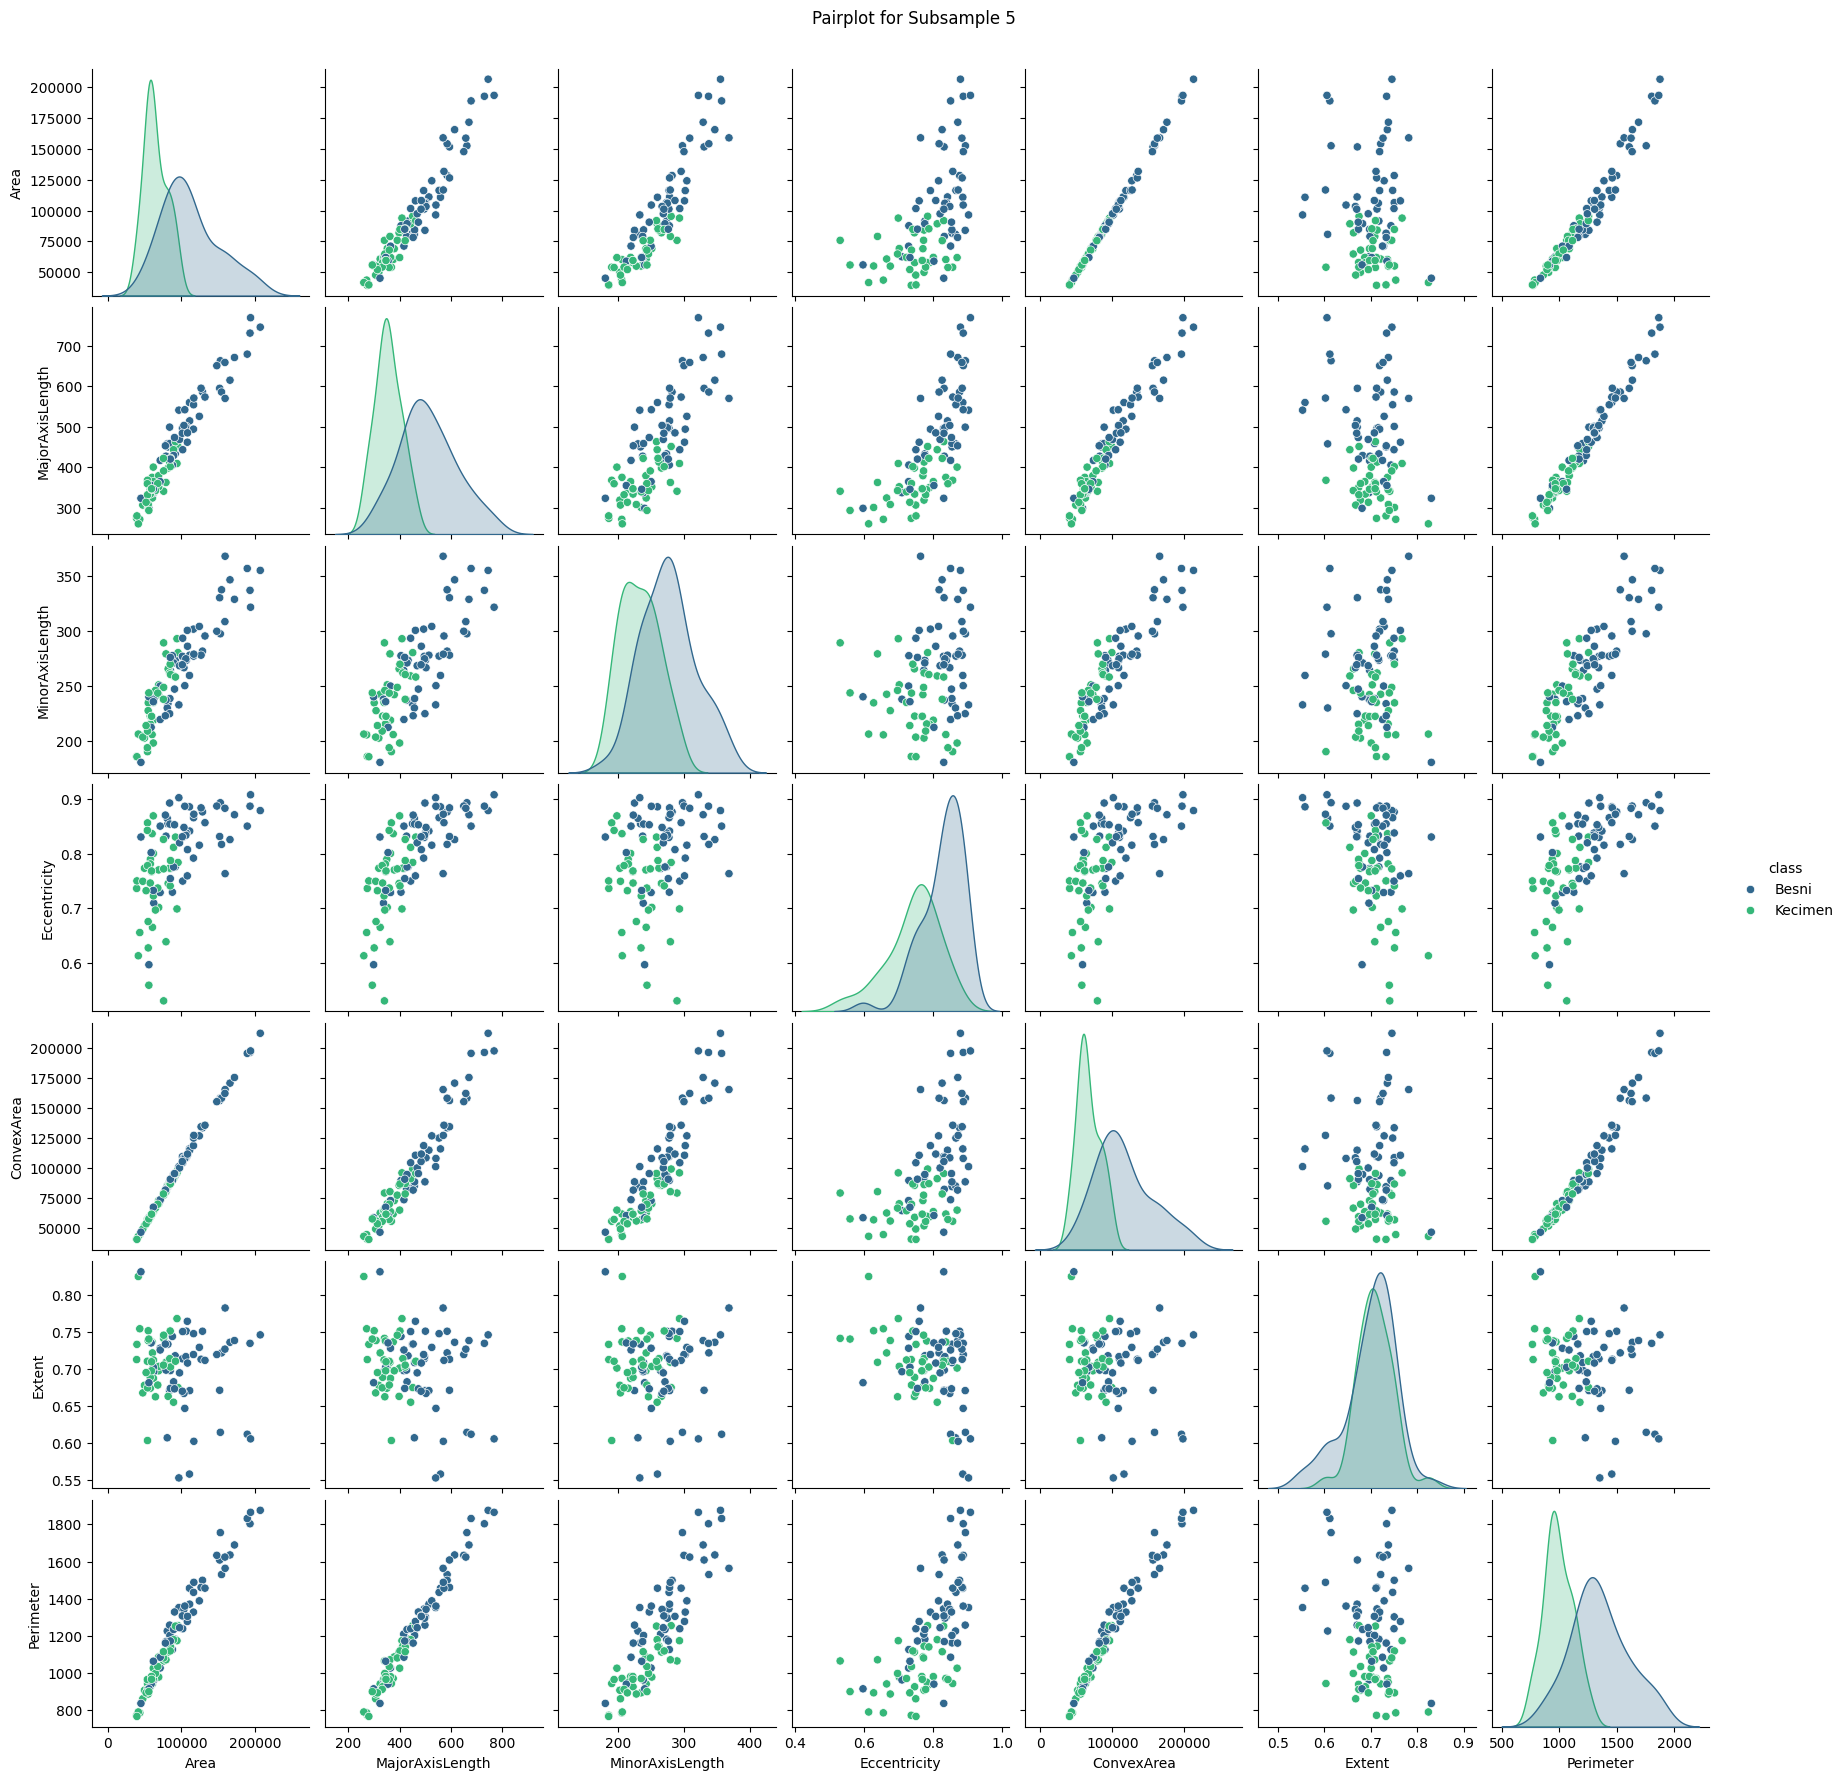

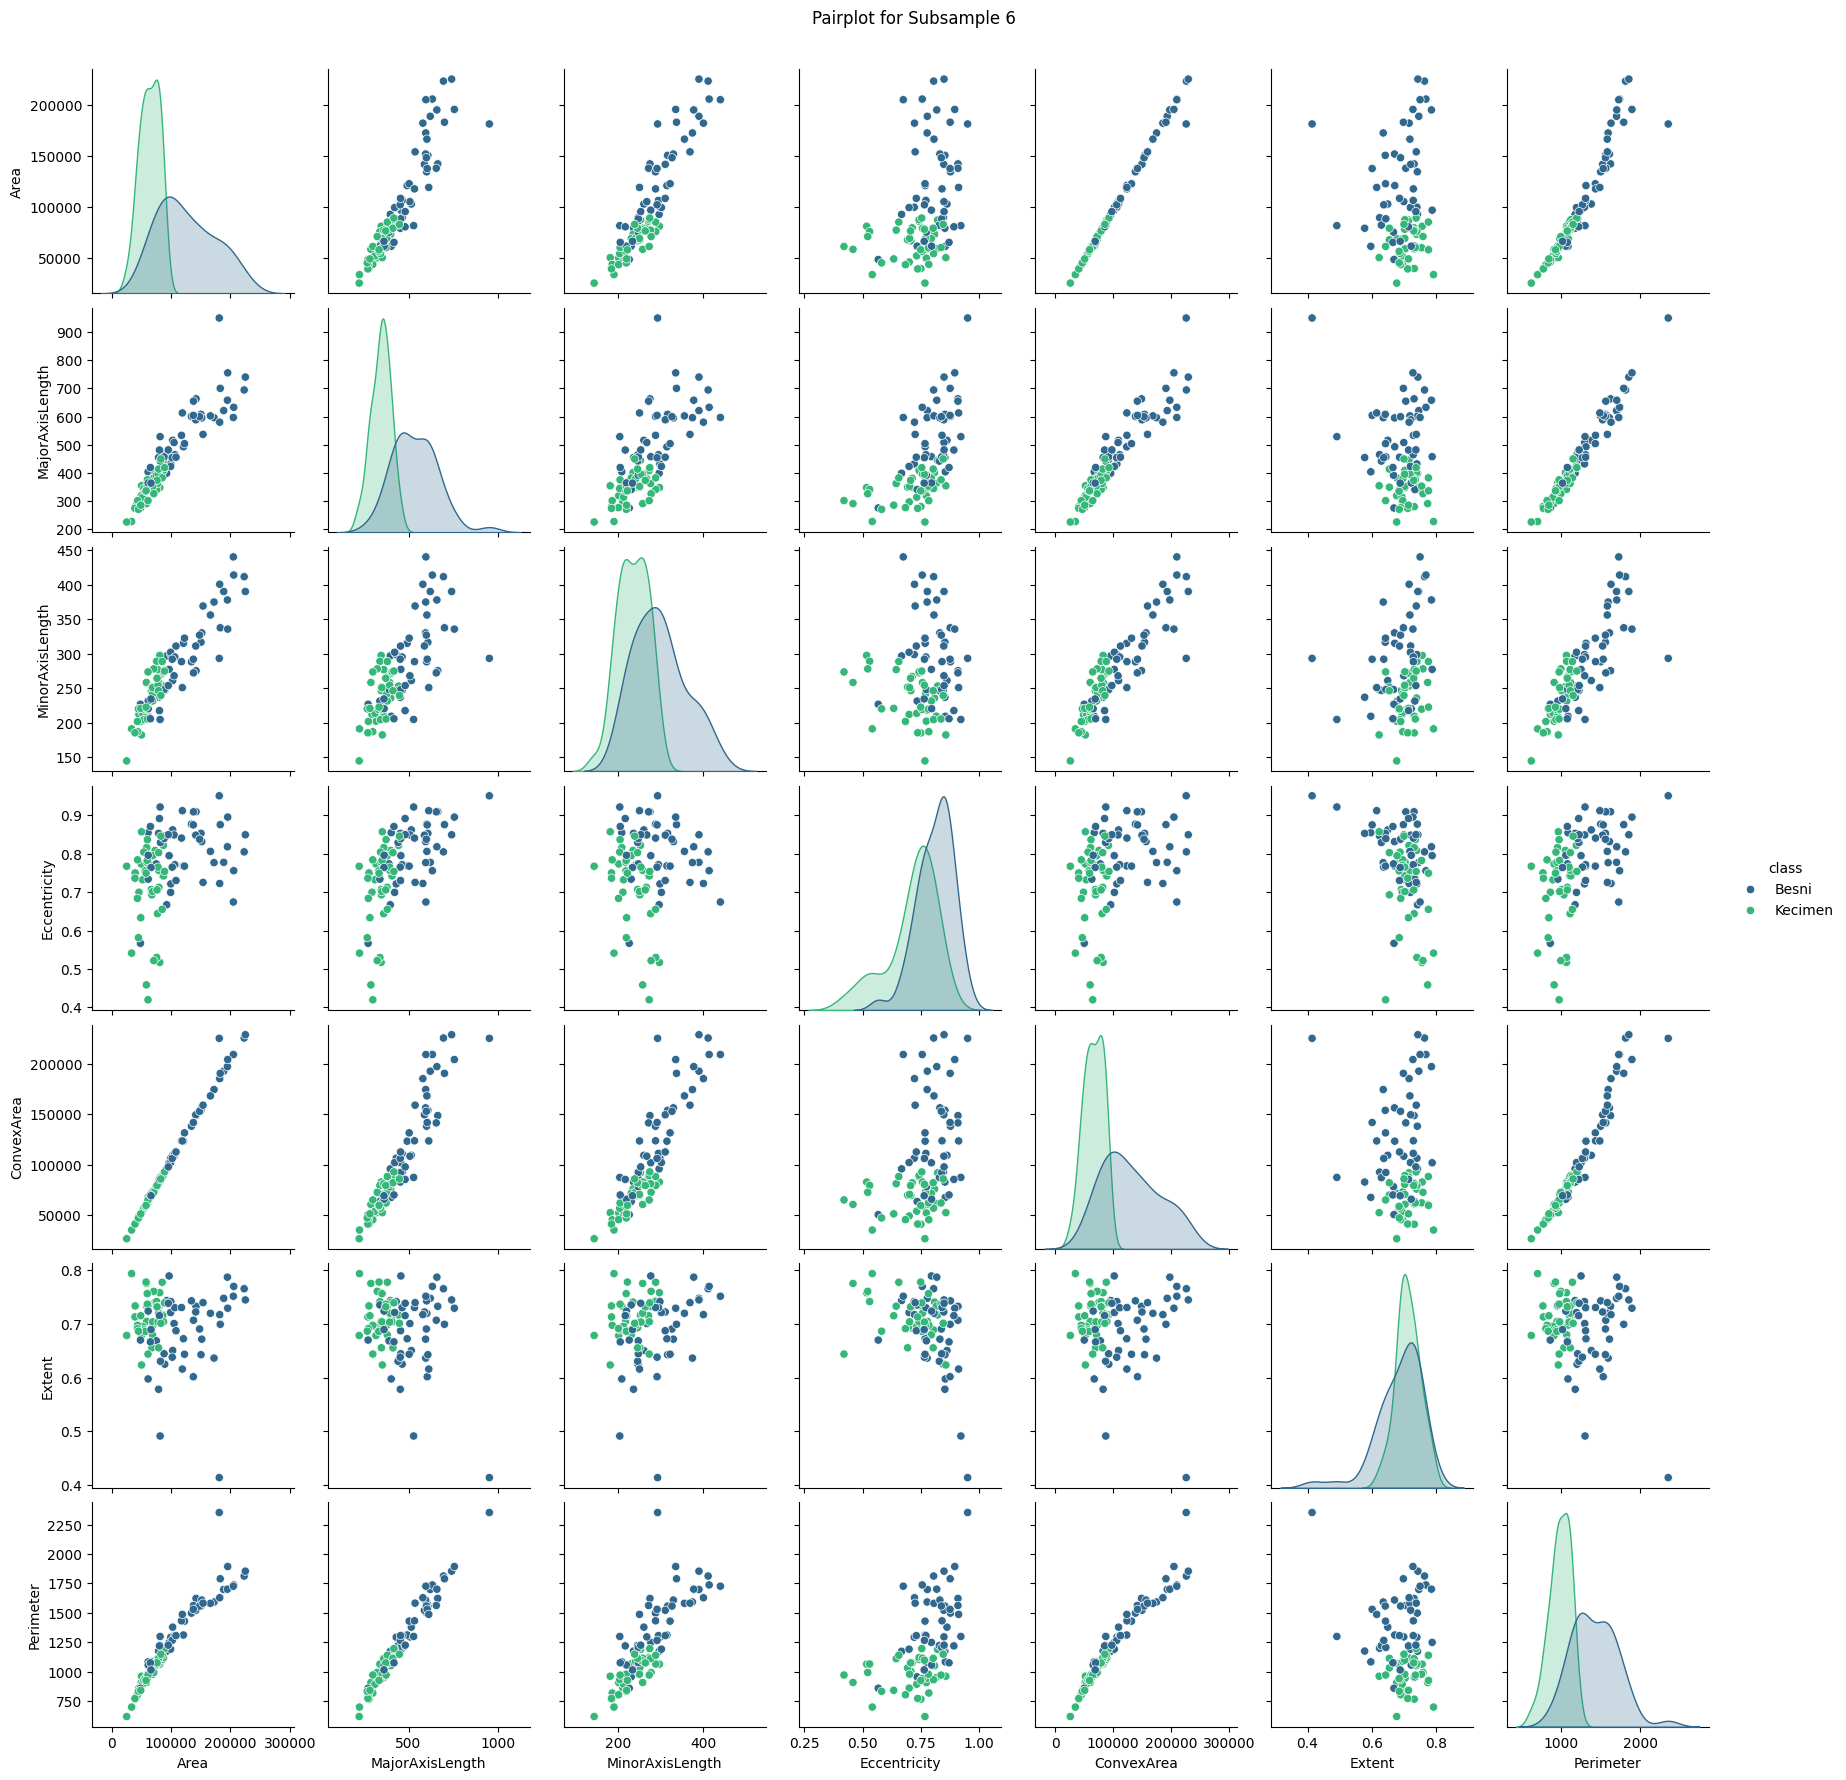

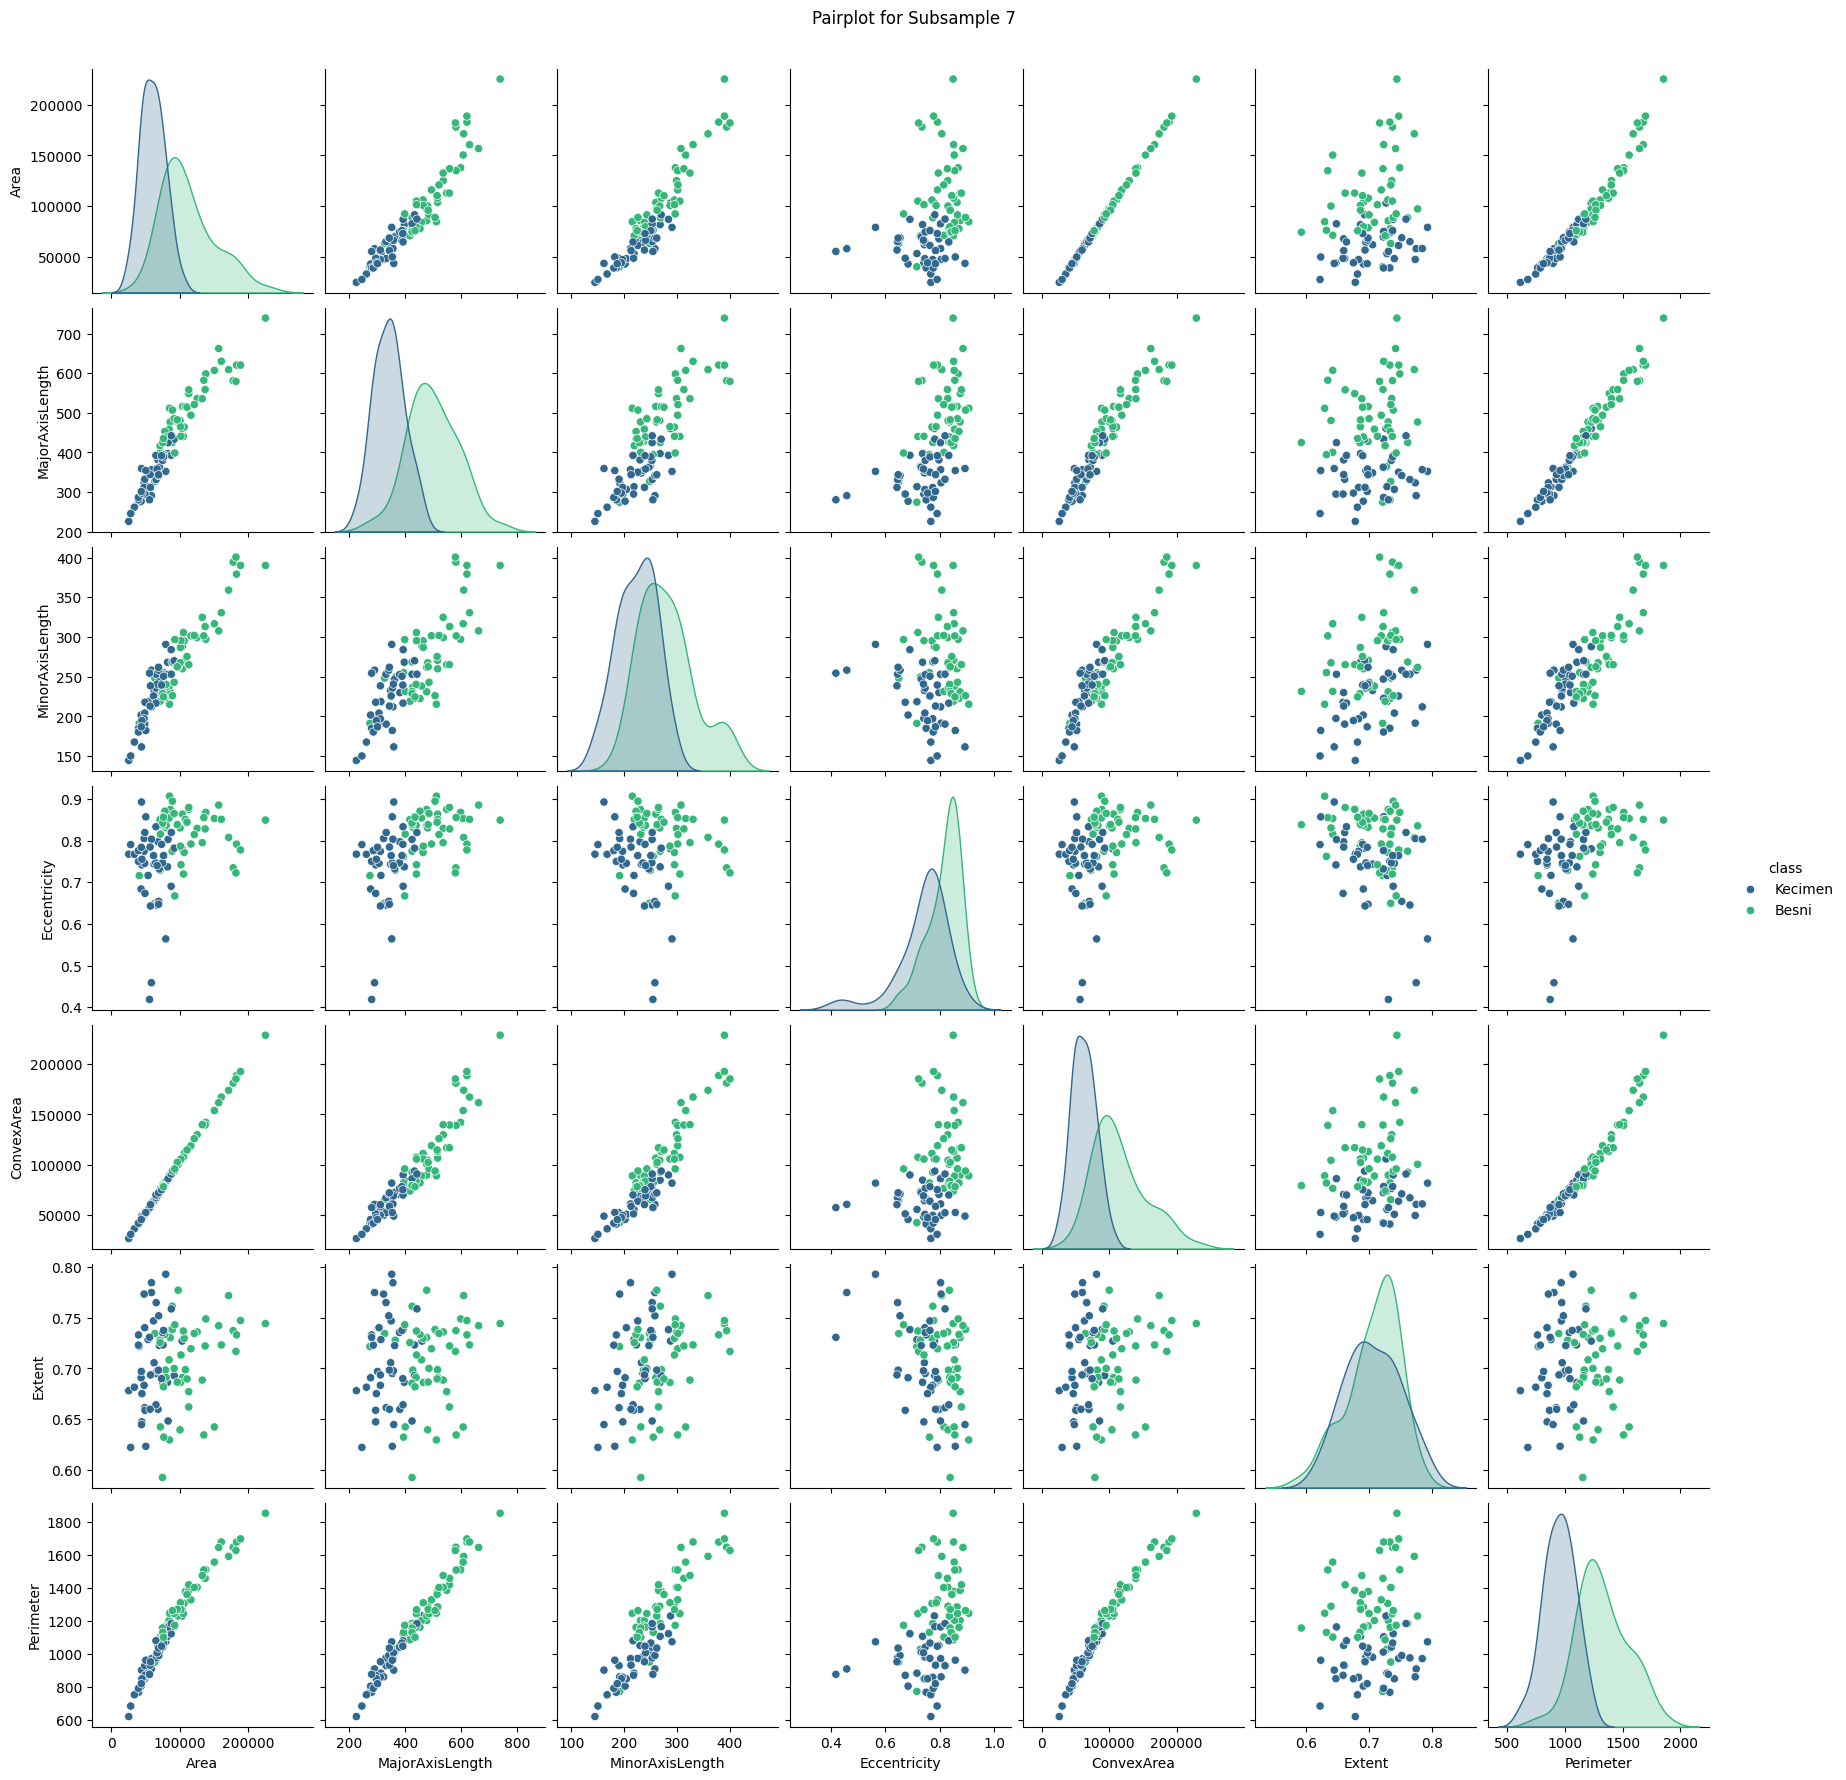

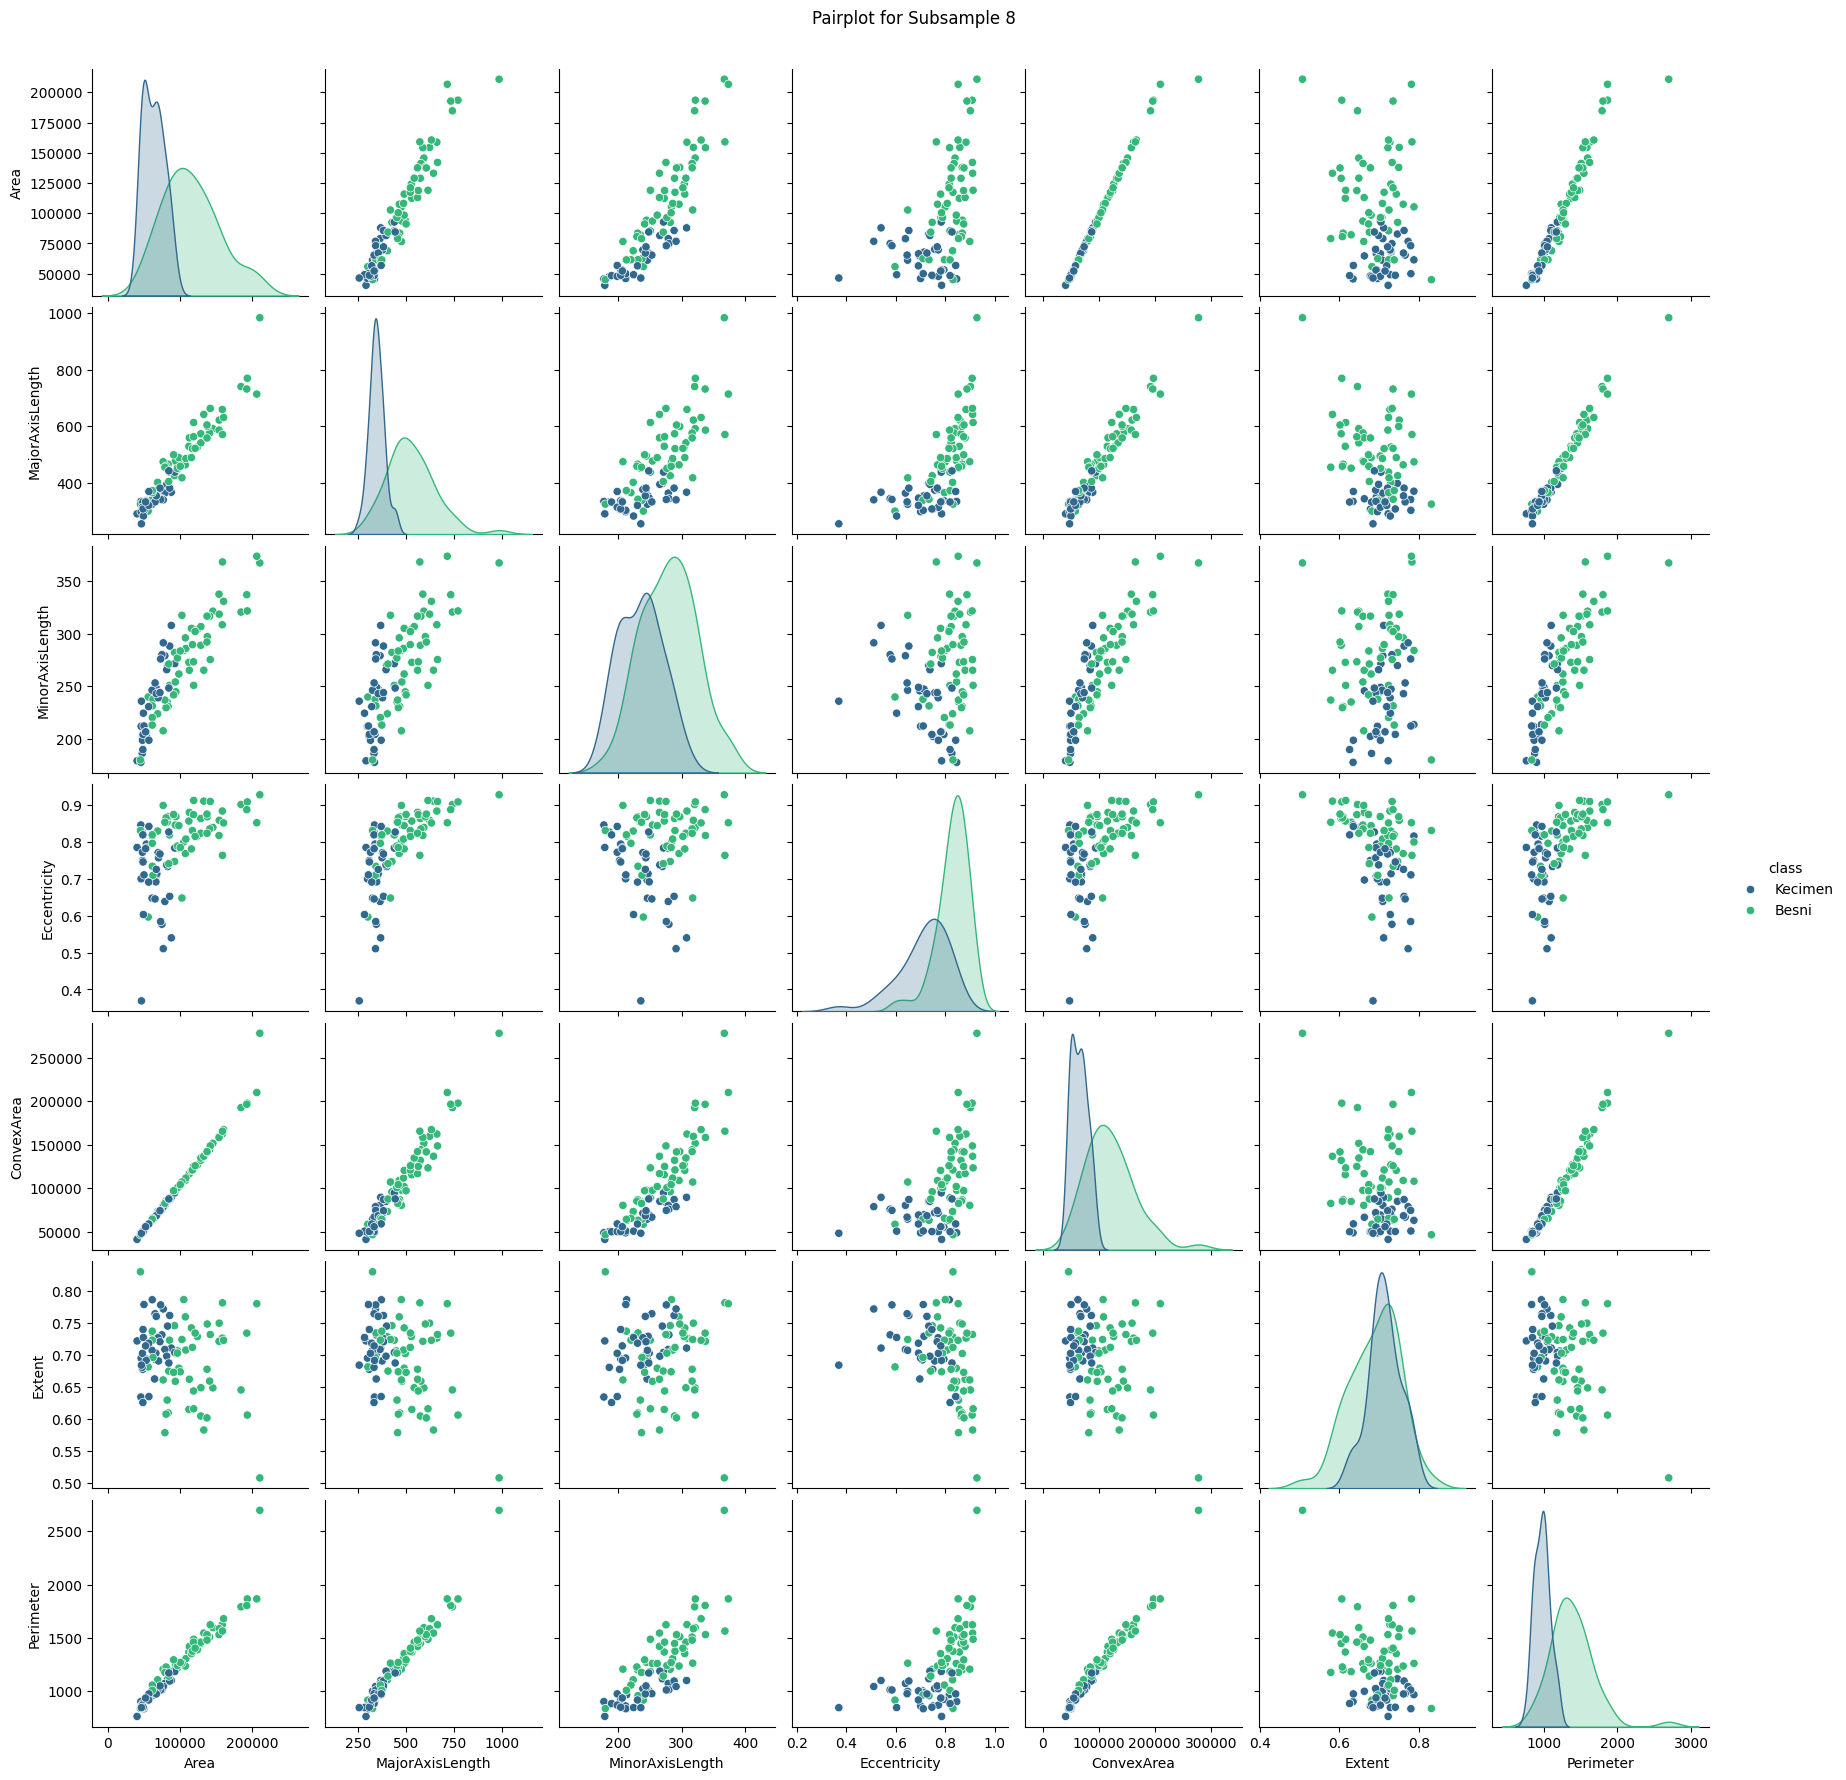

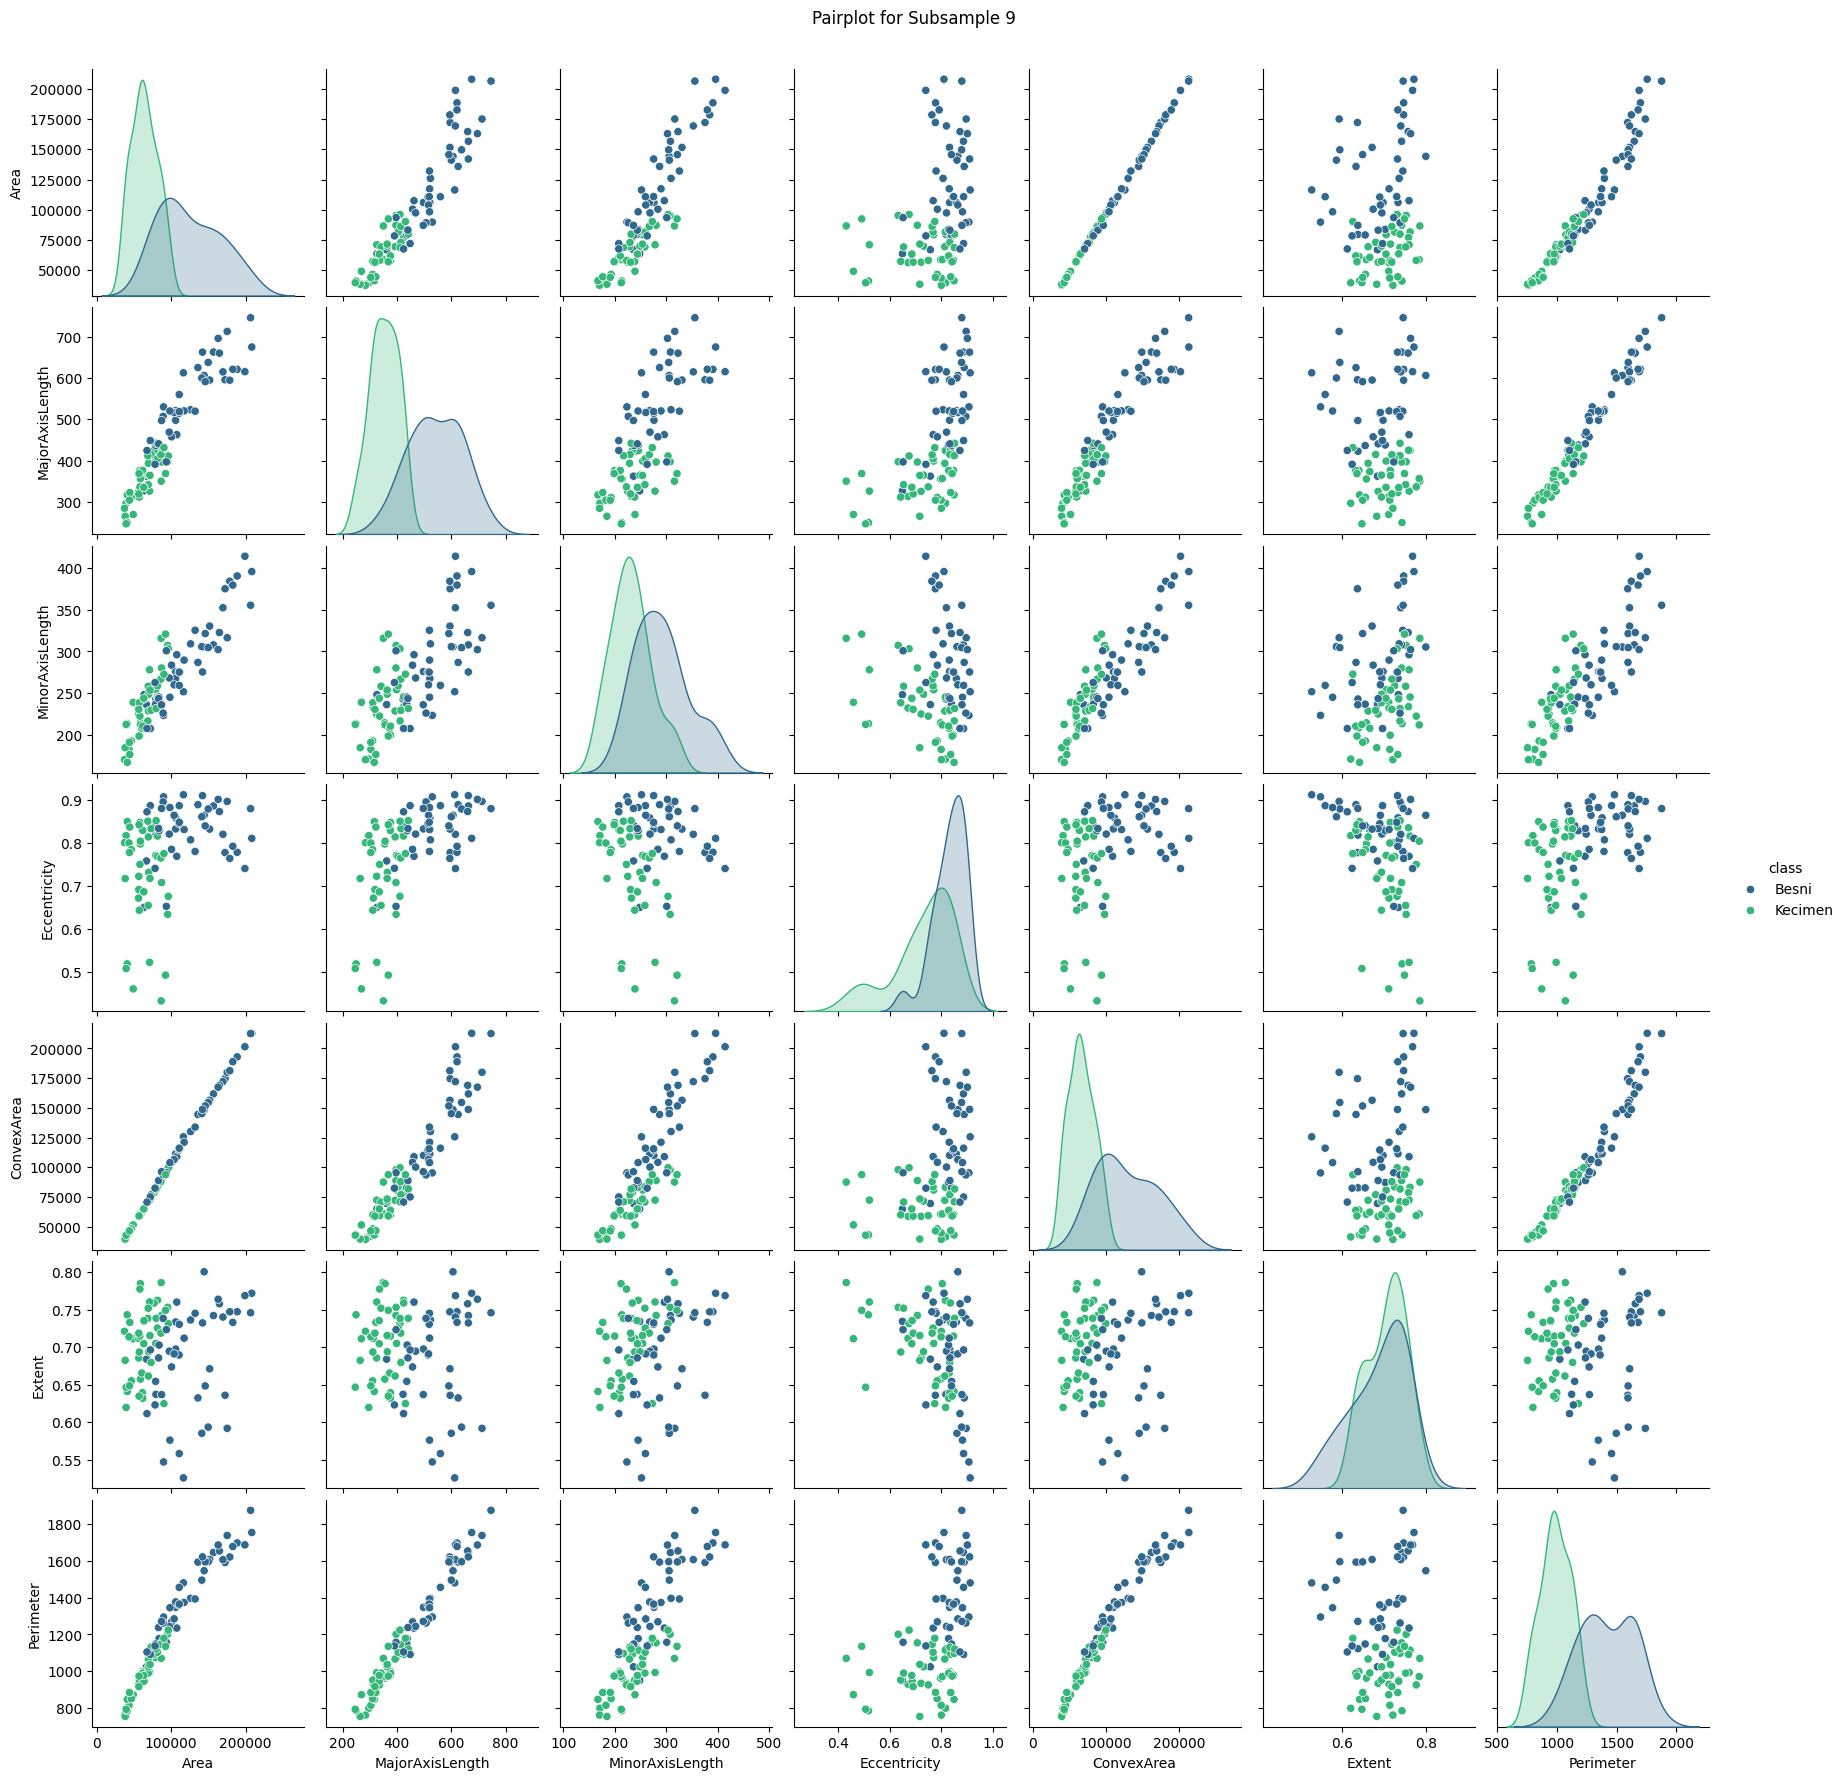

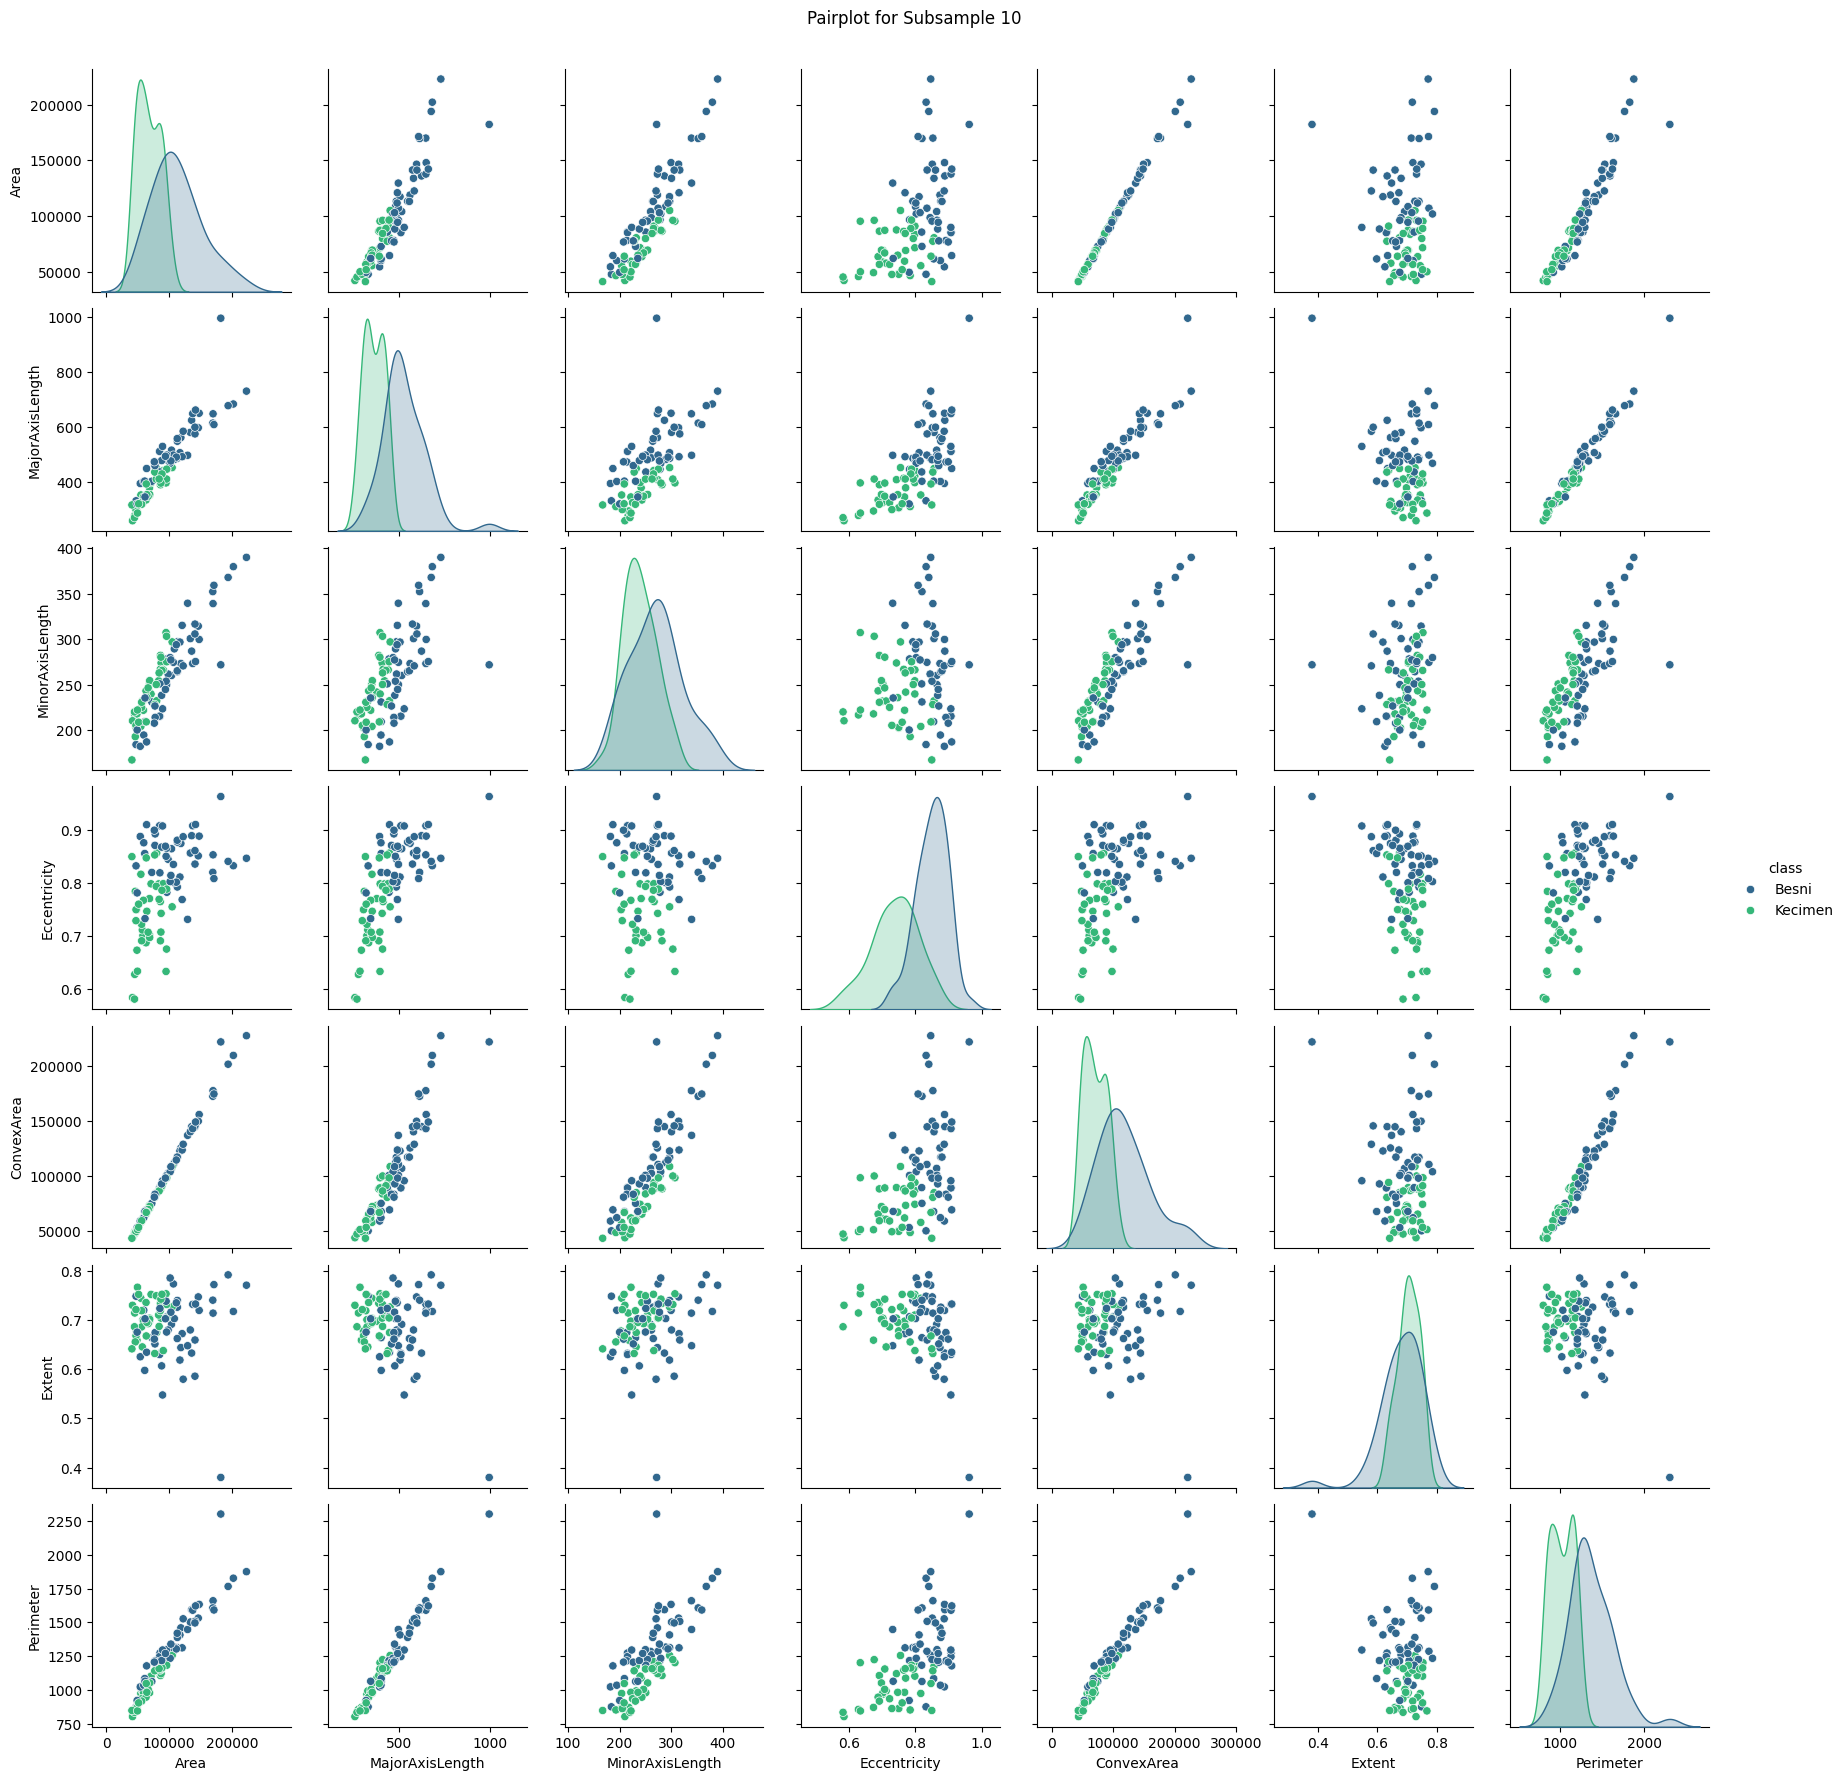

In [16]:
X = kecimen_besni.data.features
y = kecimen_besni.data.targets

df = pd.concat([X, y], axis=1)
df.columns = list(X.columns) + ['class']

num_subsamples = 10
subsample_size = len(df) // num_subsamples

for i in range(num_subsamples):
    subsample = df.sample(subsample_size, random_state=i)
    sns.pairplot(subsample, hue='class', palette='viridis')
    plt.suptitle(f'Pairplot for Subsample {i+1}', y=1.02)
    plt.show()

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

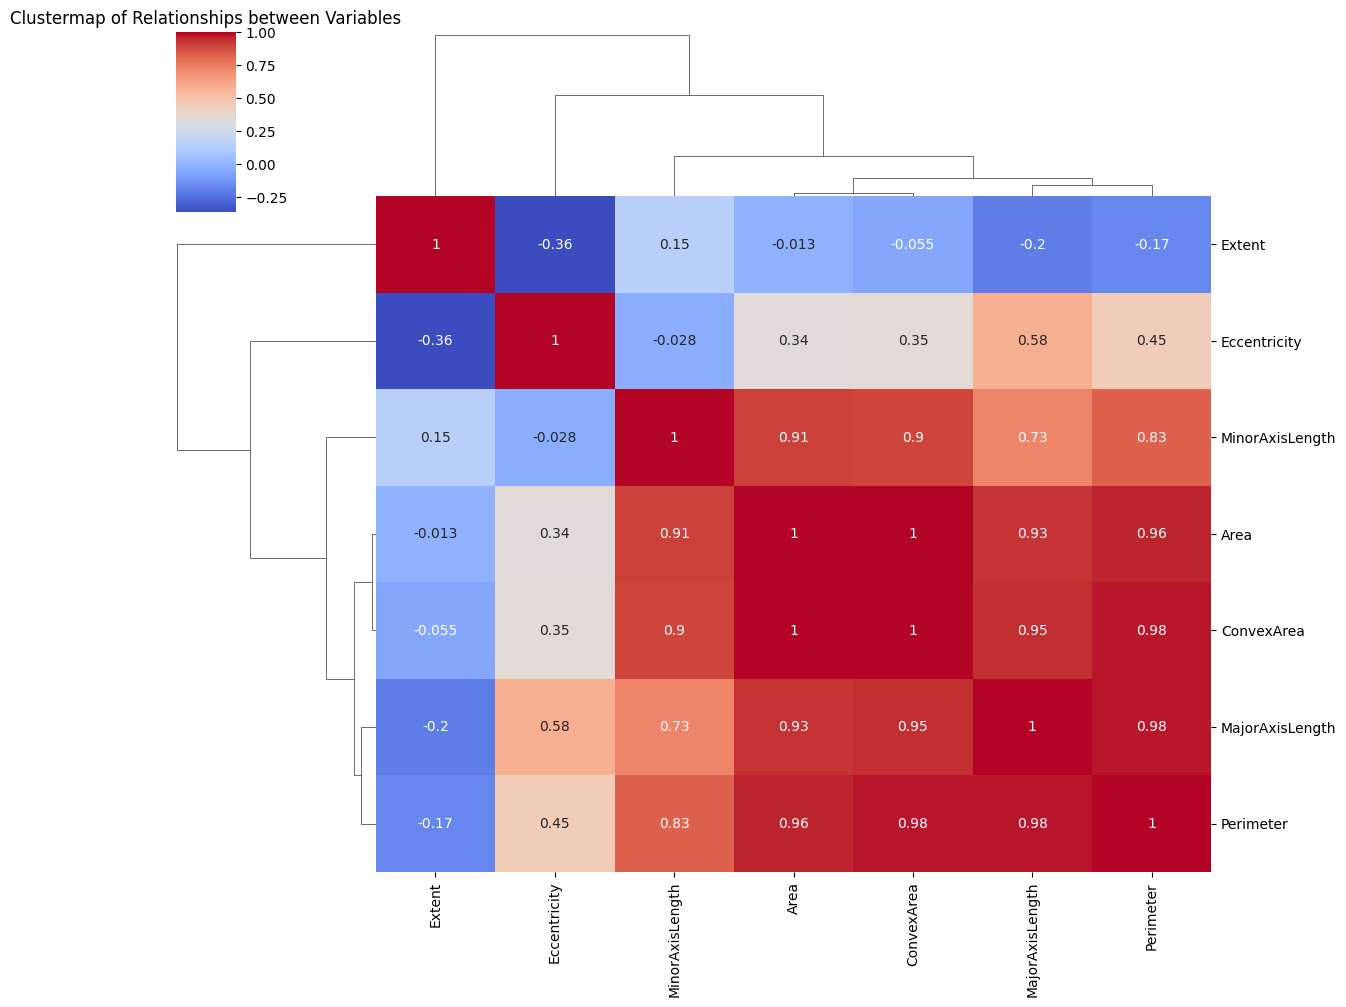

In [7]:
X = kecimen_besni.data.features
y = kecimen_besni.data.targets

y = y.values.ravel()
y_encoded = LabelEncoder().fit_transform(y)
df = pd.concat([X, pd.Series(y_encoded, name='class')], axis=1)

correlation_matrix = X.corr()
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', figsize=(12, 10))
plt.title('Clustermap of Relationships between Variables')
plt.show()


**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using gridsearch**

In [8]:
X = kecimen_besni.data.features
y = kecimen_besni.data.targets
y = y.values.ravel()

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [9]:
print("Initial Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Initial Model Performance:
Accuracy: 0.8500
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        86
           1       0.83      0.90      0.86        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180

Confusion Matrix:
[[68 18]
 [ 9 85]]


In [10]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters found by GridSearchCV:
{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [11]:
best_svc = grid_search.best_estimator_
best_svc.fit(X_train, y_train)

y_pred_best = best_svc.predict(X_test)

In [12]:
print("Improved Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

Improved Model Performance:
Accuracy: 0.8556
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        86
           1       0.90      0.82      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



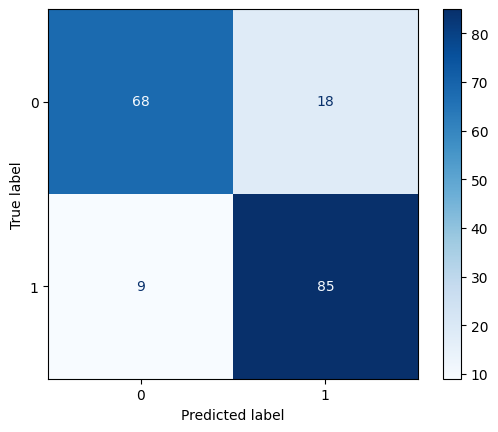

Confusion Matrix:
[[68 18]
 [ 9 85]]
True Positives: 68
False Positives: 18
False Negatives: 9
True Negatives: 85


In [13]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

print("Confusion Matrix:")
print(cm)

TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives: {TN}")